## Prepearing data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import numpy as np
import pandas as pd
import _pickle as pickle
import os

import re

In [2]:
sublabels = pd.read_hdf('//data/cms2010/data_not_f_JetHT.hdf5', "data")

In [3]:
np.mean(sublabels)

runId       279241.534327
lumiId         694.025505
isSig            0.974962
Csc              0.998577
Dt               0.998577
Ecal             0.996484
Egamma           0.995129
Es               0.998577
Hcal             0.998000
Hlt              0.998521
Jetmet           0.995846
L1tcalo          0.983631
L1tmu            0.998245
Lumi             0.998577
Muon             0.995613
Pix              0.997570
Rpc              0.995006
Strip            0.996619
Track            0.995613
new_json         0.985005
dtype: float64

In [4]:
data_features = pd.read_hdf('/home/olgako/data/data_features_JetHT.hdf5', "data")
labels = 1-pd.read_hdf('/home/olgako/data/labels_JetHT.hdf5', 'labels')

In [5]:
all_features = data_features.columns

In [6]:
Muon_features = [s for s in all_features if (s[:3] == 'qMu')]# and (s[3:7] != 'Cosm')]
len(Muon_features), Muon_features

(439,
 ['qMu0En_0',
  'qMu0En_1',
  'qMu0En_2',
  'qMu0En_3',
  'qMu0En_4',
  'qMu0En_5',
  'qMu0En_6',
  'qMu0Eta_0',
  'qMu0Eta_1',
  'qMu0Eta_2',
  'qMu0Eta_3',
  'qMu0Eta_4',
  'qMu0Eta_5',
  'qMu0Eta_6',
  'qMu0Phi_0',
  'qMu0Phi_1',
  'qMu0Phi_2',
  'qMu0Phi_3',
  'qMu0Phi_4',
  'qMu0Phi_5',
  'qMu0Phi_6',
  'qMu0Pt_0',
  'qMu0Pt_1',
  'qMu0Pt_2',
  'qMu0Pt_3',
  'qMu0Pt_4',
  'qMu0Pt_5',
  'qMu0Pt_6',
  'qMu1En_0',
  'qMu1En_1',
  'qMu1En_3',
  'qMu1En_4',
  'qMu1En_5',
  'qMu1En_6',
  'qMu1Eta_0',
  'qMu1Eta_1',
  'qMu1Eta_2',
  'qMu1Eta_3',
  'qMu1Eta_4',
  'qMu1Eta_5',
  'qMu1Eta_6',
  'qMu1Phi_0',
  'qMu1Phi_1',
  'qMu1Phi_2',
  'qMu1Phi_3',
  'qMu1Phi_4',
  'qMu1Phi_5',
  'qMu1Phi_6',
  'qMu1Pt_0',
  'qMu1Pt_1',
  'qMu1Pt_3',
  'qMu1Pt_4',
  'qMu1Pt_5',
  'qMu1Pt_6',
  'qMu2En_0',
  'qMu2En_1',
  'qMu2En_3',
  'qMu2En_4',
  'qMu2En_5',
  'qMu2En_6',
  'qMu2Eta_0',
  'qMu2Eta_1',
  'qMu2Eta_2',
  'qMu2Eta_3',
  'qMu2Eta_4',
  'qMu2Eta_5',
  'qMu2Eta_6',
  'qMu2Phi_0',
  'qMu

In [7]:
Pho_features = [s for s in all_features if s[:4] == 'qPho']
len(Pho_features), Pho_features

(224,
 ['qPho0En_0',
  'qPho0En_1',
  'qPho0En_3',
  'qPho0En_4',
  'qPho0En_5',
  'qPho0En_6',
  'qPho0Eta_0',
  'qPho0Eta_1',
  'qPho0Eta_2',
  'qPho0Eta_3',
  'qPho0Eta_4',
  'qPho0Eta_5',
  'qPho0Eta_6',
  'qPho0Phi_0',
  'qPho0Phi_1',
  'qPho0Phi_2',
  'qPho0Phi_3',
  'qPho0Phi_4',
  'qPho0Phi_5',
  'qPho0Phi_6',
  'qPho0Pt_0',
  'qPho0Pt_1',
  'qPho0Pt_3',
  'qPho0Pt_4',
  'qPho0Pt_5',
  'qPho0Pt_6',
  'qPho1En_0',
  'qPho1En_1',
  'qPho1En_3',
  'qPho1En_4',
  'qPho1En_5',
  'qPho1En_6',
  'qPho1Eta_0',
  'qPho1Eta_1',
  'qPho1Eta_2',
  'qPho1Eta_3',
  'qPho1Eta_5',
  'qPho1Eta_6',
  'qPho1Phi_0',
  'qPho1Phi_1',
  'qPho1Phi_2',
  'qPho1Phi_3',
  'qPho1Phi_5',
  'qPho1Phi_6',
  'qPho1Pt_0',
  'qPho1Pt_1',
  'qPho1Pt_3',
  'qPho1Pt_4',
  'qPho1Pt_5',
  'qPho1Pt_6',
  'qPho2En_0',
  'qPho2En_1',
  'qPho2En_4',
  'qPho2En_5',
  'qPho2En_6',
  'qPho2Eta_0',
  'qPho2Eta_1',
  'qPho2Eta_2',
  'qPho2Eta_3',
  'qPho2Eta_5',
  'qPho2Eta_6',
  'qPho2Phi_0',
  'qPho2Phi_1',
  'qPho2Phi_2',

In [8]:
Cal_features = [s for s in all_features if s[:4] == 'qCal']
len(Cal_features), Cal_features

(280,
 ['qCalJet0En_0',
  'qCalJet0En_1',
  'qCalJet0En_2',
  'qCalJet0En_3',
  'qCalJet0En_4',
  'qCalJet0En_5',
  'qCalJet0En_6',
  'qCalJet0Eta_0',
  'qCalJet0Eta_1',
  'qCalJet0Eta_2',
  'qCalJet0Eta_3',
  'qCalJet0Eta_4',
  'qCalJet0Eta_5',
  'qCalJet0Eta_6',
  'qCalJet0Phi_0',
  'qCalJet0Phi_1',
  'qCalJet0Phi_2',
  'qCalJet0Phi_3',
  'qCalJet0Phi_4',
  'qCalJet0Phi_5',
  'qCalJet0Phi_6',
  'qCalJet0Pt_0',
  'qCalJet0Pt_1',
  'qCalJet0Pt_2',
  'qCalJet0Pt_3',
  'qCalJet0Pt_4',
  'qCalJet0Pt_5',
  'qCalJet0Pt_6',
  'qCalJet1En_0',
  'qCalJet1En_1',
  'qCalJet1En_2',
  'qCalJet1En_3',
  'qCalJet1En_4',
  'qCalJet1En_5',
  'qCalJet1En_6',
  'qCalJet1Eta_0',
  'qCalJet1Eta_1',
  'qCalJet1Eta_2',
  'qCalJet1Eta_3',
  'qCalJet1Eta_4',
  'qCalJet1Eta_5',
  'qCalJet1Eta_6',
  'qCalJet1Phi_0',
  'qCalJet1Phi_1',
  'qCalJet1Phi_2',
  'qCalJet1Phi_3',
  'qCalJet1Phi_4',
  'qCalJet1Phi_5',
  'qCalJet1Phi_6',
  'qCalJet1Pt_0',
  'qCalJet1Pt_1',
  'qCalJet1Pt_2',
  'qCalJet1Pt_3',
  'qCalJet1P

In [9]:
PF_features = [s for s in all_features if s[:3] == 'qPF']
#PF_features = PF_features[:3*7]
len(PF_features), PF_features

(878,
 ['qPFChMetPhi_0',
  'qPFChMetPhi_1',
  'qPFChMetPhi_2',
  'qPFChMetPhi_3',
  'qPFChMetPhi_4',
  'qPFChMetPhi_5',
  'qPFChMetPhi_6',
  'qPFChMetPt_0',
  'qPFChMetPt_1',
  'qPFChMetPt_2',
  'qPFChMetPt_3',
  'qPFChMetPt_4',
  'qPFChMetPt_5',
  'qPFChMetPt_6',
  'qPFJet0Eta_0',
  'qPFJet0Eta_1',
  'qPFJet0Eta_2',
  'qPFJet0Eta_3',
  'qPFJet0Eta_4',
  'qPFJet0Eta_5',
  'qPFJet0Eta_6',
  'qPFJet0Phi_0',
  'qPFJet0Phi_1',
  'qPFJet0Phi_2',
  'qPFJet0Phi_3',
  'qPFJet0Phi_4',
  'qPFJet0Phi_5',
  'qPFJet0Phi_6',
  'qPFJet0Pt_0',
  'qPFJet0Pt_1',
  'qPFJet0Pt_2',
  'qPFJet0Pt_3',
  'qPFJet0Pt_4',
  'qPFJet0Pt_5',
  'qPFJet0Pt_6',
  'qPFJet1Eta_0',
  'qPFJet1Eta_1',
  'qPFJet1Eta_2',
  'qPFJet1Eta_3',
  'qPFJet1Eta_4',
  'qPFJet1Eta_5',
  'qPFJet1Eta_6',
  'qPFJet1Phi_0',
  'qPFJet1Phi_1',
  'qPFJet1Phi_2',
  'qPFJet1Phi_3',
  'qPFJet1Phi_4',
  'qPFJet1Phi_5',
  'qPFJet1Phi_6',
  'qPFJet1Pt_0',
  'qPFJet1Pt_1',
  'qPFJet1Pt_2',
  'qPFJet1Pt_3',
  'qPFJet1Pt_4',
  'qPFJet1Pt_5',
  'qPFJet1

In [10]:
#20% for test set
indx_train = np.arange(data_features.shape[0]-int(data_features.shape[0]/5), dtype='int32')
indx_test = np.arange(data_features.shape[0]-int(data_features.shape[0]/5),data_features.shape[0], dtype='int32')

# from sklearn.model_selection import train_test_split
# indx_train, indx_test = train_test_split(np.arange(len(labels), dtype='int32'), stratify=labels, test_size=0.2, random_state = 1)

from sklearn.model_selection import train_test_split
indx_train, indx_val = train_test_split(indx_train, stratify=np.array(labels.iloc[indx_train], 'float32'), test_size=0.1, random_state = 1)



In [11]:

%env THEANO_FLAGS=device=cuda,gpuarray.preallocate=0.8,floatX=float32
#%env MKL_THREADING_LAYER=GNU
import numpy as np
import theano, theano.tensor as T
from lasagne.layers import *

env: THEANO_FLAGS=device=cuda,gpuarray.preallocate=0.8,floatX=float32


Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'/usr/bin/ld: cannot find -lcudnn\ncollect2: error: ld returned 1 exit status\n'
Preallocating 9151/11439 Mb (0.800000) on cuda
Mapped name None to device cuda: Tesla K80 (E5A6:00:00.0)


In [12]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

from collections import defaultdict
from IPython import display
import time

In [13]:
num_bad = np.sum(labels)
num_good = len(labels)-np.sum(labels)

weights = 0.5 / np.where(labels == 0.0, num_good, num_bad)
weights *= len(labels)

In [14]:
# lumi_bad = np.sum(lumi[labels == 0.0])
# lumi_good = np.sum(lumi[labels == 1.0])

In [15]:
# ### By normalizing weights we implicitly define equal probabilities for each class
# weights = lumi / np.where(labels == 1.0, lumi_good, lumi_bad)
# weights *= lumi.shape[0]

In [16]:
# w_bad = np.sum(weights[labels == 0.0])
# w_good = np.sum(weights[labels == 1.0])

In [17]:
channels_features = dict()

channels_features['muons'] = Muon_features
channels_features['photons'] = Pho_features
channels_features['PF'] = PF_features
channels_features['calo'] = Cal_features
# for k in [('muons', 'muons'), ('photons', 'photons'), ('minibias', 'PF'), ('minibias', 'calo')]:
#     channels_features[k[1]] = grouped[k]

In [18]:
[ (g, len(fs)) for g, fs in channels_features.items() ]

[('muons', 439), ('photons', 224), ('PF', 878), ('calo', 280)]

## Building netwrok

In [19]:
### For simplicity each feature group is put into its own shared variable.
shareds = {}

for k in channels_features:
    features = channels_features[k]

    shareds[k] = theano.shared(
        data_features[features].get_values().astype('float32'),
        name = 'X %s' % k
    )

In [20]:
labels = np.array(labels, 'float32')

In [21]:
labels_shared = theano.shared(labels, 'labels')
weights_shared = theano.shared(weights.astype('float32'), 'weights')

In [22]:
batch_indx = T.ivector('batch indx')

In [23]:
def batch_stream(X, batch_size=32):
    indx = np.random.permutation(X.shape[0])
    n_batches = X.shape[0] / batch_size

    for i in range(int(n_batches)):
        batch_indx = indx[(i * batch_size):(i * batch_size + batch_size)]
        yield X[batch_indx]

In [24]:
from lasagne import *

In [25]:
def build_network(shared, batch_indx, num_units = (50, 10), n_dropout=2, p_dropout=0.25):
    n_features = shared.get_value().shape[1]
    X_batch = shared[batch_indx]

    input_layer = layers.InputLayer(shape=(None, n_features), input_var=X_batch)
    net = input_layer
    
    net = layers.DropoutLayer(net, p=0.1, rescale=False)
    
    for i, n in enumerate(num_units):
        net = layers.DenseLayer(net, num_units=n, nonlinearity=nonlinearities.sigmoid)
        if i < n_dropout:
            net = layers.DropoutLayer(net, p=p_dropout, rescale=True)
    
    net = layers.DenseLayer(net, num_units=1, nonlinearity=nonlinearities.sigmoid)
    
    det_prediction = T.flatten(layers.get_output(net, deterministic=True))
    train_prediction = T.flatten(layers.get_output(net, deterministic=False))
    
    return net, det_prediction, train_prediction

In [32]:
networks = {}
det_predictions = {}
train_predictions = {}

for k in shareds:
    shared = shareds[k]

    net, det_prediction, train_prediction = build_network(shared, batch_indx, num_units=(100, 50, 10), p_dropout=0.25)
    
    det_predictions[k] = det_prediction
    train_predictions[k] = train_prediction

    networks[k] = net

In [33]:
get_get_predictions = {}
get_stochastic_predictions = {}

for k in det_predictions:
    get_get_predictions[k] = theano.function([batch_indx], det_predictions[k])
    get_stochastic_predictions[k] = theano.function([batch_indx], train_predictions[k])

In [34]:
labels_batch = labels_shared[batch_indx]
weights_batch = weights_shared[batch_indx]

In [35]:
from functools import reduce

In [36]:
reg = reduce(lambda a, b: T.maximum(a, b), [
    regularization.regularize_network_params(networks[k], penalty=regularization.l2)
    for k in networks
])

In [37]:
def fuzzy_and(args):
    s = reduce(lambda a, b: a + b, args)
    return T.exp(s - 4.0)

train_global_prediction = fuzzy_and(train_predictions.values())
det_global_prediction = fuzzy_and(det_predictions.values())

In [38]:
c_reg = T.fscalar('c reg')
learning_rate = T.fscalar('learning rate')

coef_loss = theano.shared(np.array(0.7, dtype=theano.config.floatX))
decay = np.array(0.8, dtype=theano.config.floatX)

In [39]:
log_losses = -((1 - labels_batch) * T.log(1 - train_global_prediction) + labels_batch * T.log(train_global_prediction))

pure_loss = T.mean(weights_batch * log_losses)

loss = pure_loss +  c_reg * reg

pure_losses = {}
for k in networks:
    log_loss = -((1 - labels_batch) * T.log(1 - train_predictions[k]) + labels_batch * T.log(train_predictions[k]))
    pure_losses[k] = T.mean(weights_batch * log_loss)

modified_loss = (1 - coef_loss)*loss + coef_loss*np.sum(pure_losses[k] for k in networks)/4.

Modified loss function to accelerate convergence is used:

$ L' = (1-C) * L + C * (L_1 + L_2 + L_3 + L_4) / 4 $,

where:  $L$ - old loss (cross-entropy for “fuzzy AND” output),
$L_i$ - 'companion' losses, $C$ - constant to regulate amount of “pretraining” ($C$ ~ 1, $C$ < 1).

Companion losses can be cross-entropy of corresponding subnetwork scores against global labels. So it is simillar to the pretraining of separate networks on global labels.

Every $k$ epochs constant C is decreased, and ensemble performance becomes determinant.

In [40]:
params = reduce(lambda a, b: a + b, [
        layers.get_all_params(net)
        for net in networks.values()
])

upd = updates.adam(modified_loss, params, learning_rate = learning_rate)

In [41]:
train = theano.function([batch_indx, c_reg, learning_rate], [modified_loss, pure_loss], updates=upd)
get_loss = theano.function([batch_indx], pure_loss)

get_prediction = theano.function([batch_indx], det_global_prediction)
get_train_prediction = theano.function([batch_indx], train_global_prediction)

In [42]:
#indx_train, indx_test = train_test_split(np.arange(data.shape[0], dtype='int32'), stratify=labels, test_size=0.1, random_state = 1)

In [43]:
n_epoches = 150
batch_size = 256
n_batches = indx_train.shape[0] / batch_size
lr = 1e-3
c_reg = 1.0e-7

pure_losses = np.zeros(shape=(2, n_epoches), dtype='float32')
validation_losses = np.zeros(shape=(len(networks)+1, n_epoches), dtype='float32')

In [44]:
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('grid', linestyle="-", color='gray')
plt.rc('axes', edgecolor='gray')

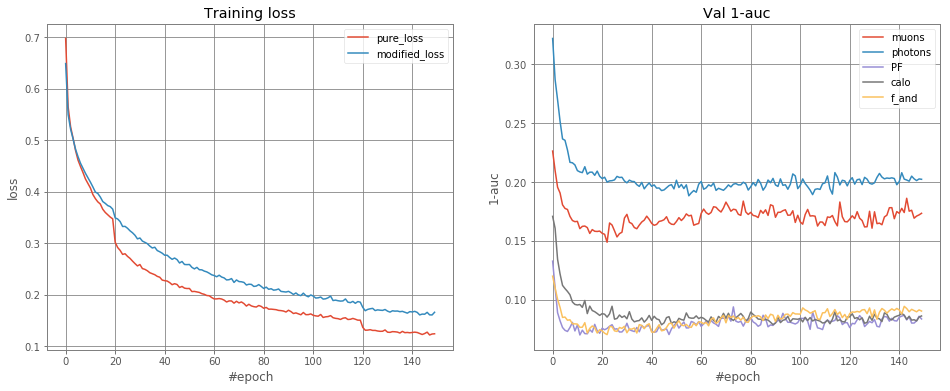

In [45]:
for epoch in range(0, n_epoches):
    if epoch%130 == 129:   
        #save the network's weights
        netInfo  = {}
        for net in networks:
            netInfo['network '+str(net)] = networks[net]
            netInfo['params '+str(net)] =  layers.get_all_param_values(networks[net])
        Net_FileName = 'pretraining_loss'+str(epoch)+'.pkl'
        pickle.dump(netInfo, open(os.path.join('//data/cms2010/', Net_FileName), 'wb'))
        #decrease learning rate and amount of 'pretraining' loss
    if epoch%100 == 20:    
        coef_loss.set_value(coef_loss.get_value() * decay)
        lr = lr*0.9
        
    batch_loss_m = 0.
    batch_loss_p = 0.
    for i, idx in enumerate(batch_stream(indx_train, batch_size=batch_size)):
        mod, pure = train(idx, c_reg, lr)
        batch_loss_m += mod
        batch_loss_p += pure
    pure_losses[0,epoch] = batch_loss_p/n_batches
    pure_losses[1,epoch] = batch_loss_m/n_batches
    
    sum_pred_test = np.zeros((len(indx_val)))   
    for k, net in enumerate(networks):       
        prediction_net = get_get_predictions[net](indx_val)
        sum_pred_test += prediction_net
        validation_losses[k,epoch] = 1 - roc_auc_score(
            labels[indx_val],
            prediction_net,
            sample_weight=weights[indx_val]) 
    f_and = np.exp(sum_pred_test - 4.)   
    validation_losses[k+1,epoch] = 1 - roc_auc_score(labels[indx_val],f_and,sample_weight=weights[indx_val]) 
    
    #plots
    display.clear_output(wait=True)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
        
    axes[0].set_title("Training loss")
    axes[0].set_xlabel("#epoch")
    axes[0].set_ylabel("loss")
    for n in range(2):
        axes[0].plot(pure_losses[n][:(epoch + 1)])
    axes[0].legend(['pure_loss', 'modified_loss'], loc = 'best')
    
    axes[1].set_title("Val 1-auc")
    axes[1].set_xlabel("#epoch")
    axes[1].set_ylabel("1-auc")
    for n in range(5):
        axes[1].plot(validation_losses[n][:(epoch + 1)])
    axes[1].legend(list(networks.keys())+['f_and'], loc = 'best')
    plt.show()



In [46]:
epoch

149

In [47]:
probas_train = {}
probas_val = {}
probas_test = {}

for k in networks.keys():
    probas_train[k] = get_get_predictions[k](indx_train)
    probas_val[k] = get_get_predictions[k](indx_val)
    probas_test[k] = get_get_predictions[k](indx_test)

<function matplotlib.pyplot.show>

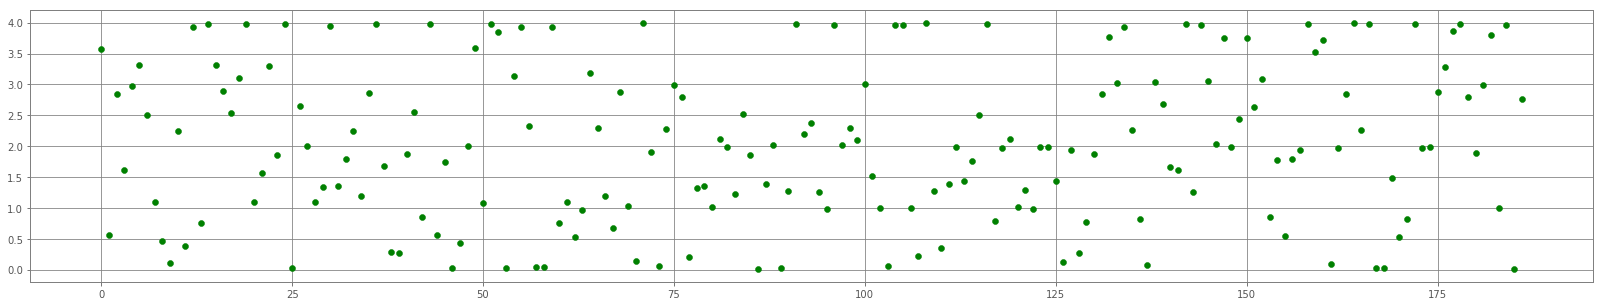

In [48]:
plt.figure(figsize=(28, 5))
a = np.zeros((len(np.where(labels[indx_val]==0)[0])))
for k in networks.keys():
    a+=probas_val[k][np.where(labels[indx_val]==0)[0]]
plt.scatter(np.arange(len(np.where(labels[indx_val]==0)[0])),a, c ='g')
plt.show

<function matplotlib.pyplot.show>

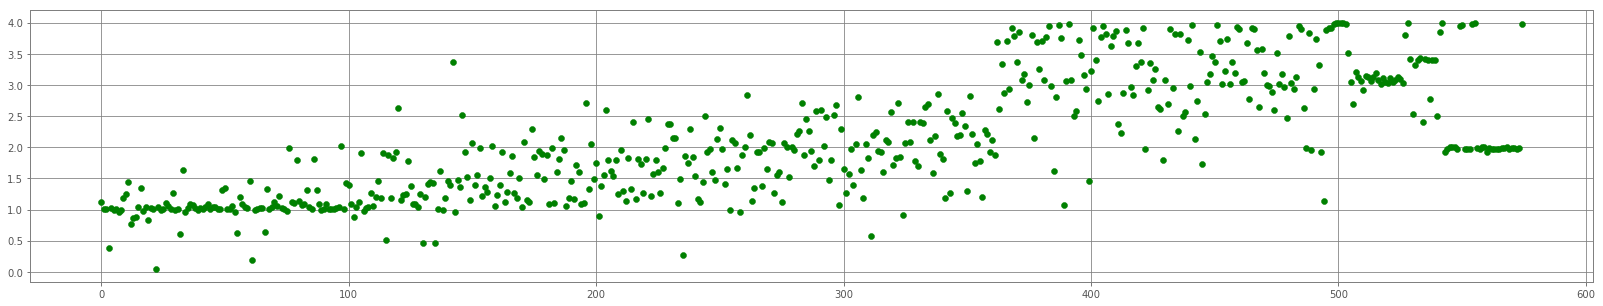

In [49]:
plt.figure(figsize=(28, 5))
a = np.zeros((len(np.where(labels[indx_test]==0)[0])))
for k in networks.keys():
    a+=probas_test[k][np.where(labels[indx_test]==0)[0]]
plt.scatter(np.arange(len(np.where(labels[indx_test]==0)[0])),a, c ='g')
plt.show

In [50]:
np.mean(a)

2.099333146606248

In [118]:
# Net_FileName = 'pretraining_loss'+str(800)+'.pkl'
# netInfoload = pickle.load(open(os.path.join('models/',Net_FileName),'rb'))
# for net in networks:
#     layers.set_all_param_values(networks[net], netInfoload['params '+str(net)]) 

# Performance plots

Deterministic output, AUC for muons : 0.827
Deterministic output, AUC for photons : 0.798
Deterministic output, AUC for PF : 0.916
Deterministic output, AUC for calo : 0.914


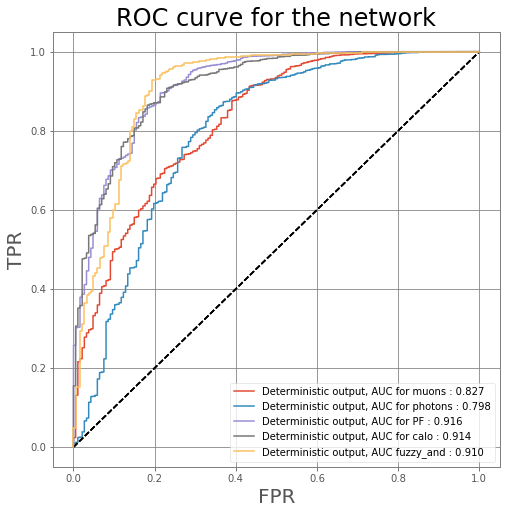

In [51]:
plt.figure(figsize=(8, 8))

sum_pred = np.zeros((len(indx_val)))
log_and = np.ones((len(indx_val)))
for k in networks.keys():
    common_proba = get_get_predictions[k](indx_val)
    sum_pred += common_proba
    log_and*= common_proba


    plt.plot([0, 1], [0, 1], '--', color='black')

    fpr, tpr, _ = roc_curve(np.array(labels, 'float32')[indx_val], common_proba, sample_weight=weights[indx_val])
    auc_score = auc(fpr, tpr, reorder=True)
    plt.plot(fpr, tpr, label='Deterministic output, AUC for %s : %.3lf' % (k, auc_score))
    print ('Deterministic output, AUC for %s : %.3lf' % (k, auc_score))
f_and = np.exp(sum_pred - 4.)

fpr, tpr, _ = roc_curve(np.array(np.array(labels, 'float32'), 'float32')[indx_val], f_and, sample_weight=weights[indx_val])
auc_score = auc(fpr, tpr, reorder=True)
plt.plot(fpr, tpr, label='Deterministic output, AUC fuzzy_and : %.3lf' % auc_score)


plt.legend(loc='lower right')
plt.title('ROC curve for the network', fontsize=24)
plt.xlabel('FPR', fontsize=20)
plt.ylabel('TPR', fontsize=20)
plt.show()

Deterministic output, AUC for muons : 0.718
Deterministic output, AUC for photons : 0.837
Deterministic output, AUC for PF : 0.952
Deterministic output, AUC for calo : 0.963


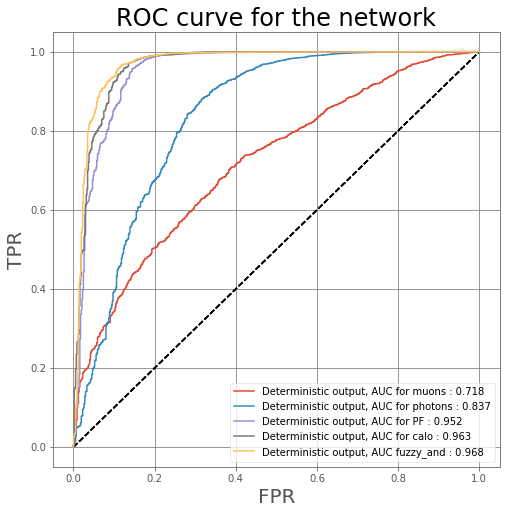

In [52]:
plt.figure(figsize=(8, 8))

sum_pred = np.zeros((len(indx_test)))
log_and = np.ones((len(indx_test)))
for k in networks.keys():
    common_proba = get_get_predictions[k](indx_test)
    sum_pred += common_proba
    log_and*= common_proba


    plt.plot([0, 1], [0, 1], '--', color='black')

    fpr, tpr, _ = roc_curve(np.array(labels, 'float32')[indx_test], common_proba, sample_weight=weights[indx_test])
    auc_score = auc(fpr, tpr, reorder=True)
    plt.plot(fpr, tpr, label='Deterministic output, AUC for %s : %.3lf' % (k, auc_score))
    print ('Deterministic output, AUC for %s : %.3lf' % (k, auc_score))
f_and = np.exp(sum_pred - 4.)

fpr, tpr, _ = roc_curve(np.array(np.array(labels, 'float32'), 'float32')[indx_test], f_and, sample_weight=weights[indx_test])
auc_score = auc(fpr, tpr, reorder=True)
plt.plot(fpr, tpr, label='Deterministic output, AUC fuzzy_and : %.3lf' % auc_score)


plt.legend(loc='lower right')
plt.title('ROC curve for the network', fontsize=24)
plt.xlabel('FPR', fontsize=20)
plt.ylabel('TPR', fontsize=20)
plt.show()

In [53]:
minproba_val = np.min(np.vstack((probas_val['PF'], probas_val['calo'],
                                 probas_val['muons'], probas_val["photons"])), axis=0)

minproba_test = np.min(np.vstack((probas_test['PF'], probas_test['calo'],
                                 probas_test['muons'], probas_test["photons"])), axis=0)

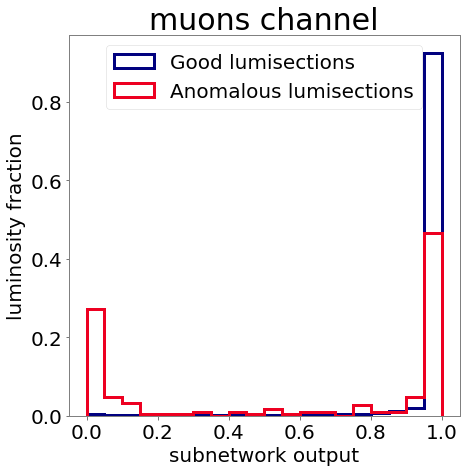

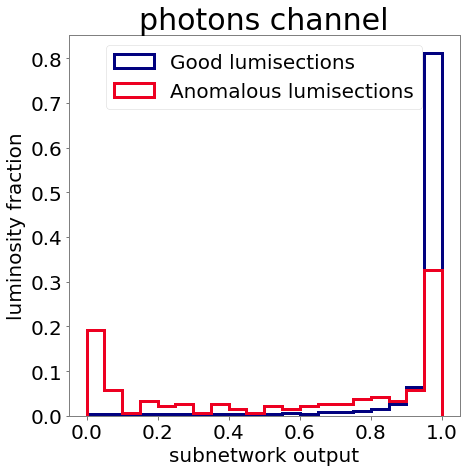

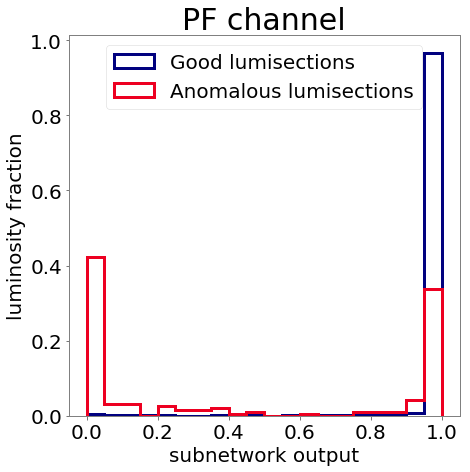

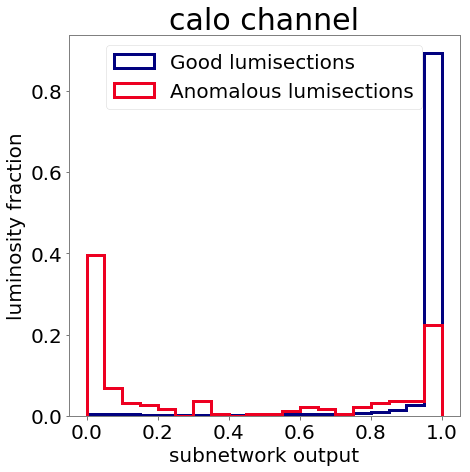

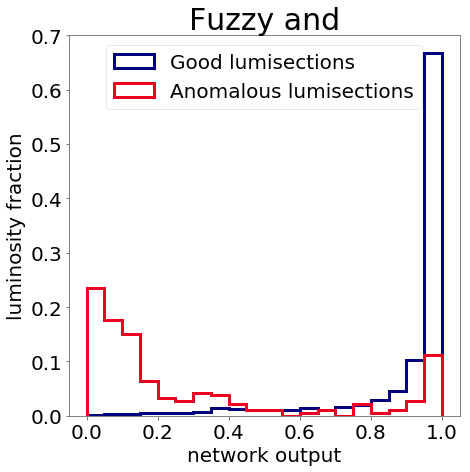

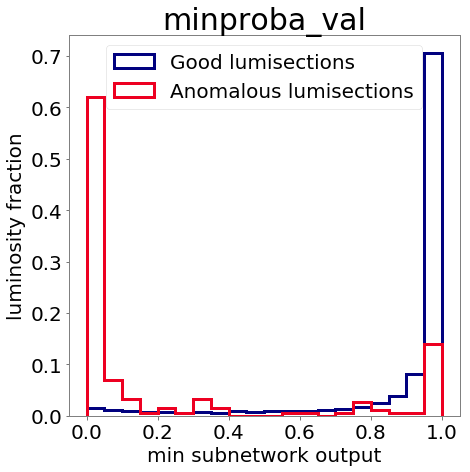

In [54]:
indx = indx_val
probas = probas_val
minproba = minproba_val

sum_pred = np.zeros((len(indx))) 
for k in networks.keys():
    proba = probas[k]
    sum_pred += proba
    colors = ['#ed0021ff','#01017f']
    plt.figure(figsize=(7, 7))
    plt.hist([
            proba[labels[indx] == 0.0],
            proba[labels[indx] == 1.0]
    ],bins=20, range=(0, 1), weights=[
        weights[indx][labels[indx] == 0.0] / np.sum(weights[indx][labels[indx] == 0.0]),
        weights[indx][labels[indx] == 1.0] / np.sum(weights[indx][labels[indx] == 1.0])
    ], histtype='step', label=['Anomalous lumisections', 'Good lumisections'], lw=3,
         alpha=1, fill= False, color=colors)
    plt.legend(loc='upper center', fontsize=20)
    plt.title('%s channel' % k, fontsize=30, color = 'black' )
    plt.ylabel('luminosity fraction', fontsize=20, color = 'black')
    plt.xlabel(r'subnetwork output', fontsize=20, color = 'black')
    plt.xticks(fontsize=20, color = 'black')
    plt.yticks(fontsize=20, color = 'black')
    plt.grid(False)
    plt.axis('on')
    
plt.figure(figsize=(7, 7))   
f_and = np.exp(sum_pred - 4.)
plt.hist([
        f_and[labels[indx] == 0.0],
        f_and[labels[indx] == 1.0]
],bins=20, range=(0, 1), weights=[
    weights[indx][labels[indx] == 0.0] / np.sum(weights[indx][labels[indx] == 0.0]),
    weights[indx][labels[indx] == 1.0] / np.sum(weights[indx][labels[indx] == 1.0])
], histtype='step', label=['Anomalous lumisections', 'Good lumisections'], lw=3,
     alpha=1, fill= False, color=colors)
plt.legend(loc='upper center', fontsize=20)
plt.title("Fuzzy and", fontsize=30, color = 'black' )
plt.ylabel('luminosity fraction', fontsize=20, color = 'black')
plt.xlabel(r'network output', fontsize=20, color = 'black')
plt.xticks(fontsize=20, color = 'black')
plt.yticks(fontsize=20, color = 'black')
plt.grid(False)
plt.axis('on')
plt.show()


proba = minproba
plt.figure(figsize=(7, 7))
plt.hist([
        proba[labels[indx] == 0.0],
        proba[labels[indx] == 1.0]
],bins=20, range=(0, 1), weights=[
    weights[indx][labels[indx] == 0.0] / np.sum(weights[indx][labels[indx] == 0.0]),
    weights[indx][labels[indx] == 1.0] / np.sum(weights[indx][labels[indx] == 1.0])
], histtype='step', label=['Anomalous lumisections', 'Good lumisections'], lw=3,
     alpha=1, fill= False, color=colors)
plt.legend(loc='upper center', fontsize=20)
plt.title('minproba_val' , fontsize=30, color = 'black' )
plt.ylabel('luminosity fraction', fontsize=20, color = 'black')
plt.xlabel(r'min subnetwork output', fontsize=20, color = 'black')
plt.xticks(fontsize=20, color = 'black')
plt.yticks(fontsize=20, color = 'black')
plt.grid(False)
plt.axis('on')
plt.show()

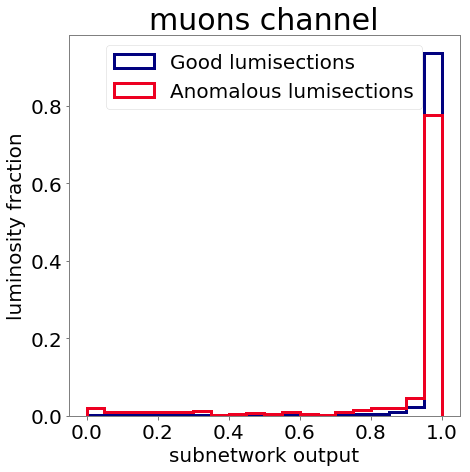

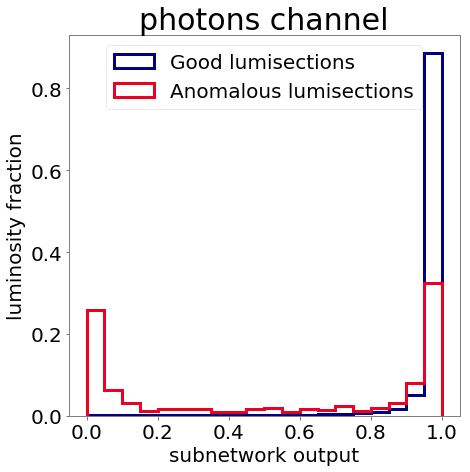

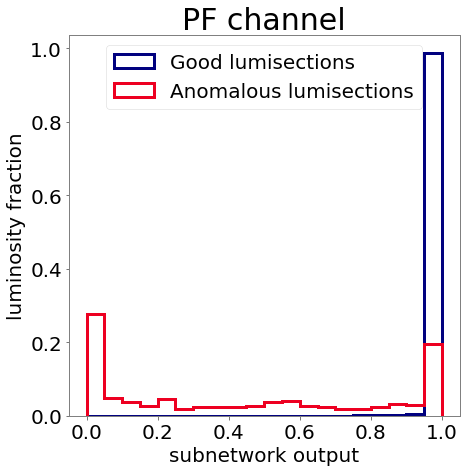

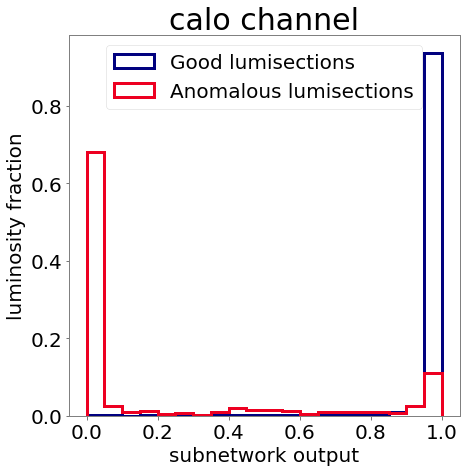

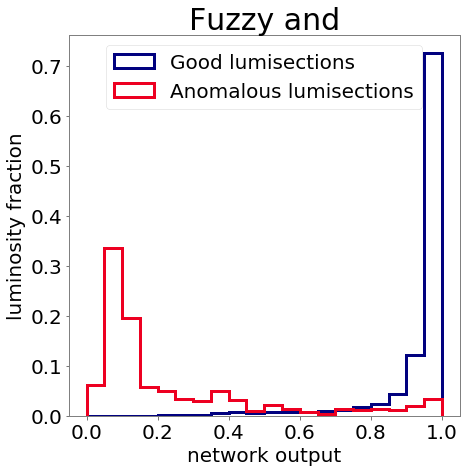

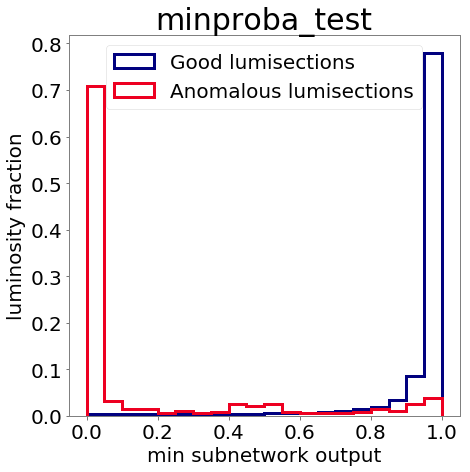

In [55]:
indx = indx_test
probas = probas_test
minproba = minproba_test

sum_pred = np.zeros((len(indx))) 
for k in networks.keys():
    proba = probas[k]
    sum_pred += proba
    colors = ['#ed0021ff','#01017f']
    plt.figure(figsize=(7, 7))
    plt.hist([
            proba[labels[indx] == 0.0],
            proba[labels[indx] == 1.0]
    ],bins=20, range=(0, 1), weights=[
        weights[indx][labels[indx] == 0.0] / np.sum(weights[indx][labels[indx] == 0.0]),
        weights[indx][labels[indx] == 1.0] / np.sum(weights[indx][labels[indx] == 1.0])
    ], histtype='step', label=['Anomalous lumisections', 'Good lumisections'], lw=3,
         alpha=1, fill= False, color=colors)
    plt.legend(loc='upper center', fontsize=20)
    plt.title('%s channel' % k, fontsize=30, color = 'black' )
    plt.ylabel('luminosity fraction', fontsize=20, color = 'black')
    plt.xlabel(r'subnetwork output', fontsize=20, color = 'black')
    plt.xticks(fontsize=20, color = 'black')
    plt.yticks(fontsize=20, color = 'black')
    plt.grid(False)
    plt.axis('on')
    
plt.figure(figsize=(7, 7))   
f_and = np.exp(sum_pred - 4.)
plt.hist([
        f_and[labels[indx] == 0.0],
        f_and[labels[indx] == 1.0]
],bins=20, range=(0, 1), weights=[
    weights[indx][labels[indx] == 0.0] / np.sum(weights[indx][labels[indx] == 0.0]),
    weights[indx][labels[indx] == 1.0] / np.sum(weights[indx][labels[indx] == 1.0])
], histtype='step', label=['Anomalous lumisections', 'Good lumisections'], lw=3,
     alpha=1, fill= False, color=colors)
plt.legend(loc='upper center', fontsize=20)
plt.title("Fuzzy and", fontsize=30, color = 'black' )
plt.ylabel('luminosity fraction', fontsize=20, color = 'black')
plt.xlabel(r'network output', fontsize=20, color = 'black')
plt.xticks(fontsize=20, color = 'black')
plt.yticks(fontsize=20, color = 'black')
plt.grid(False)
plt.axis('on')
plt.show()




proba = minproba
plt.figure(figsize=(7, 7))
plt.hist([
        proba[labels[indx] == 0.0],
        proba[labels[indx] == 1.0]
],bins=20, range=(0, 1), weights=[
    weights[indx][labels[indx] == 0.0] / np.sum(weights[indx][labels[indx] == 0.0]),
    weights[indx][labels[indx] == 1.0] / np.sum(weights[indx][labels[indx] == 1.0])
], histtype='step', label=['Anomalous lumisections', 'Good lumisections'], lw=3,
     alpha=1, fill= False, color=colors)
plt.legend(loc='upper center', fontsize=20)
plt.title('minproba_test' , fontsize=30, color = 'black' )
plt.ylabel('luminosity fraction', fontsize=20, color = 'black')
plt.xlabel(r'min subnetwork output', fontsize=20, color = 'black')
plt.xticks(fontsize=20, color = 'black')
plt.yticks(fontsize=20, color = 'black')
plt.grid(False)
plt.axis('on')
plt.show()


In [124]:
# np.save('probas_last.npy', probas) 

# # # Load
# # read_dictionary = np.load('probas.npy').item()
# # print(read_dictionary) # displays "world"

In [56]:
Ids_labels = ['runId','lumiId','lumi','isSig','subsystemQuality']
subsystemNames = ['new_json', 'L1tcalo', 'L1tmu', 'Hlt', 'Pix', 'Strip', 'Ecal', 'Hcal', 'Dt',
                    'Rpc', 'Es', 'Csc', 'Track', 'Egamma', 'Muon', 'Jetmet', ]

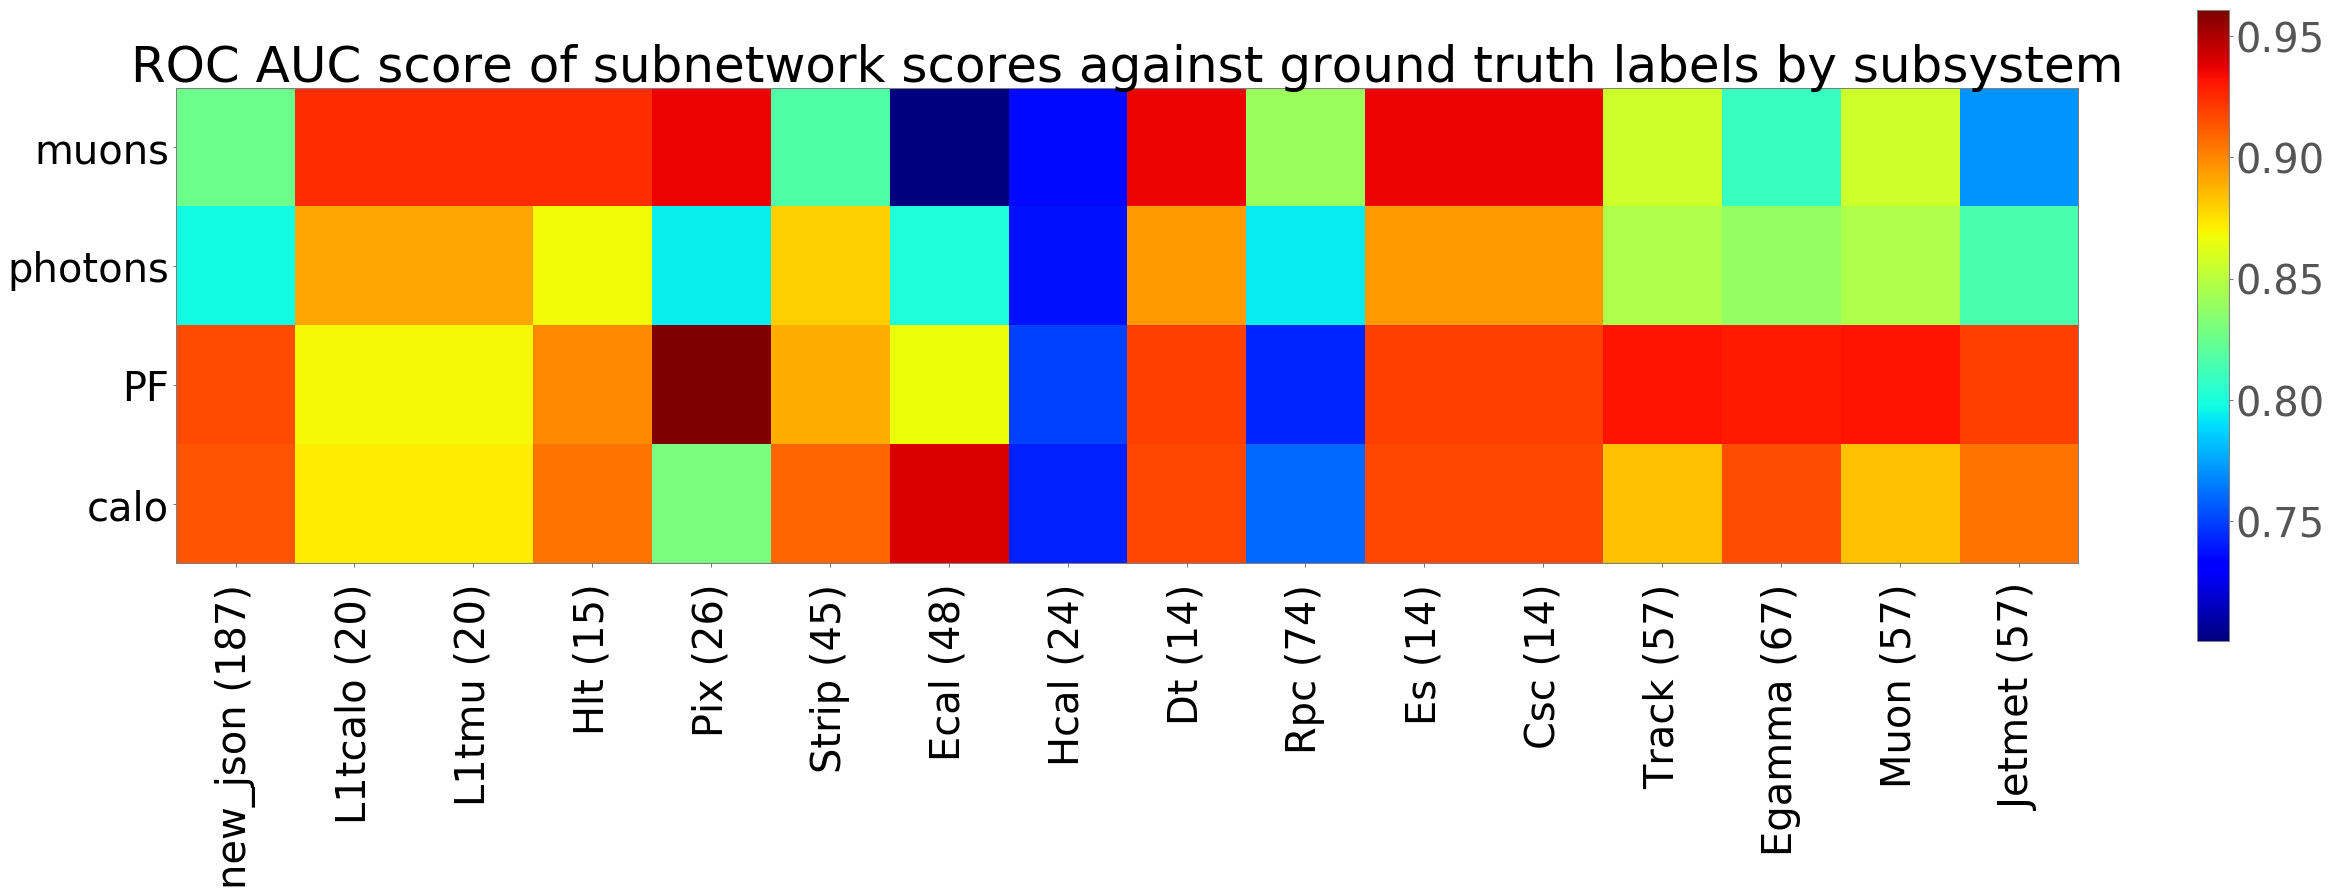

In [57]:
metric = roc_auc_score
met_name = 'roc_auc_score'
probas = probas_val
indx = indx_val



channels = networks.keys()
sub_systems = subsystemNames

aucs = np.ones(shape=(len(channels), len(sub_systems))) / 2.0

for i, channel in enumerate(channels):
    for j, sub_system in enumerate(sub_systems):
        try:
            aucs[i, j] = metric(np.array(sublabels[sub_system], 'float32')[indx], probas[channel], sample_weight=weights[indx])
            
        except Exception as e:
            print (e)
            
            
fig = plt.figure(figsize=(36, 14))

im = plt.imshow(aucs, interpolation='None', aspect=1, cmap = 'jet')
plt.colorbar(im, shrink=0.75).ax.tick_params(labelsize=40) 


plt.xticks(np.arange(len(sub_systems)), 
           [k+" ("+str(len(np.where(np.array(sublabels[k], 'float32')[indx]==0)[0]))+") " for k in sub_systems], rotation=90, fontsize=40, color = 'black')
plt.yticks(np.arange(4), [ "%s" % g for g in channels ], fontsize=40, color = 'black')
plt.title('ROC AUC score'+' of subnetwork scores against ground truth labels by subsystem', fontsize=50)
plt.grid(False)
plt.tight_layout()

plt.show()

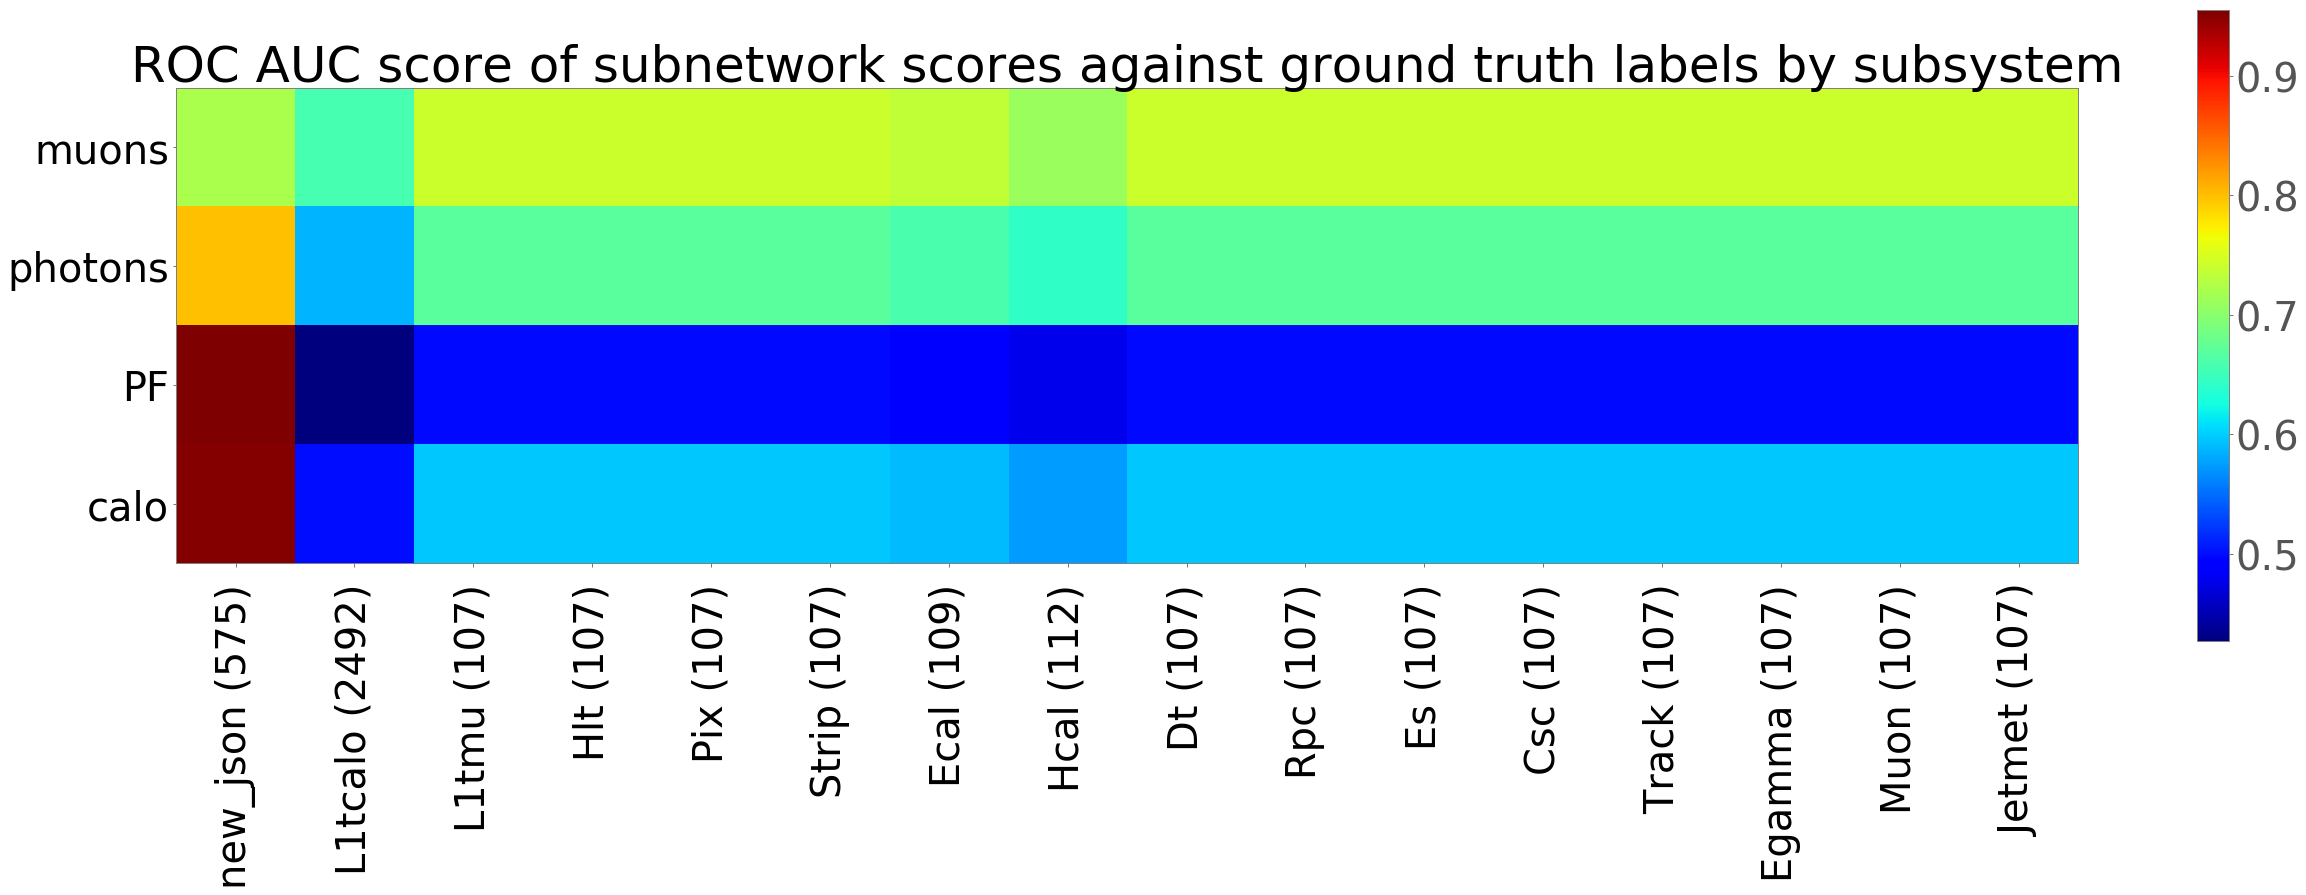

In [127]:
metric = roc_auc_score
met_name = 'roc_auc_score'
probas = probas_test
indx = indx_test



channels = networks.keys()
sub_systems = subsystemNames

aucs = np.ones(shape=(len(channels), len(sub_systems))) / 2.0

for i, channel in enumerate(channels):
    for j, sub_system in enumerate(sub_systems):
        try:
            aucs[i, j] = metric(np.array(sublabels[sub_system], 'float32')[indx], probas[channel], sample_weight=weights[indx])
            
        except Exception as e:
            print (e)
            
            
fig = plt.figure(figsize=(36, 14))

im = plt.imshow(aucs, interpolation='None', aspect=1, cmap = 'jet')
plt.colorbar(im, shrink=0.75).ax.tick_params(labelsize=40) 


plt.xticks(np.arange(len(sub_systems)), 
           [k+" ("+str(len(np.where(np.array(sublabels[k], 'float32')[indx]==0)[0]))+") " for k in sub_systems], rotation=90, fontsize=40, color = 'black')
plt.yticks(np.arange(4), [ "%s" % g for g in channels ], fontsize=40, color = 'black')
plt.title('ROC AUC score'+' of subnetwork scores against ground truth labels by subsystem', fontsize=50)
plt.grid(False)
plt.tight_layout()

plt.show()

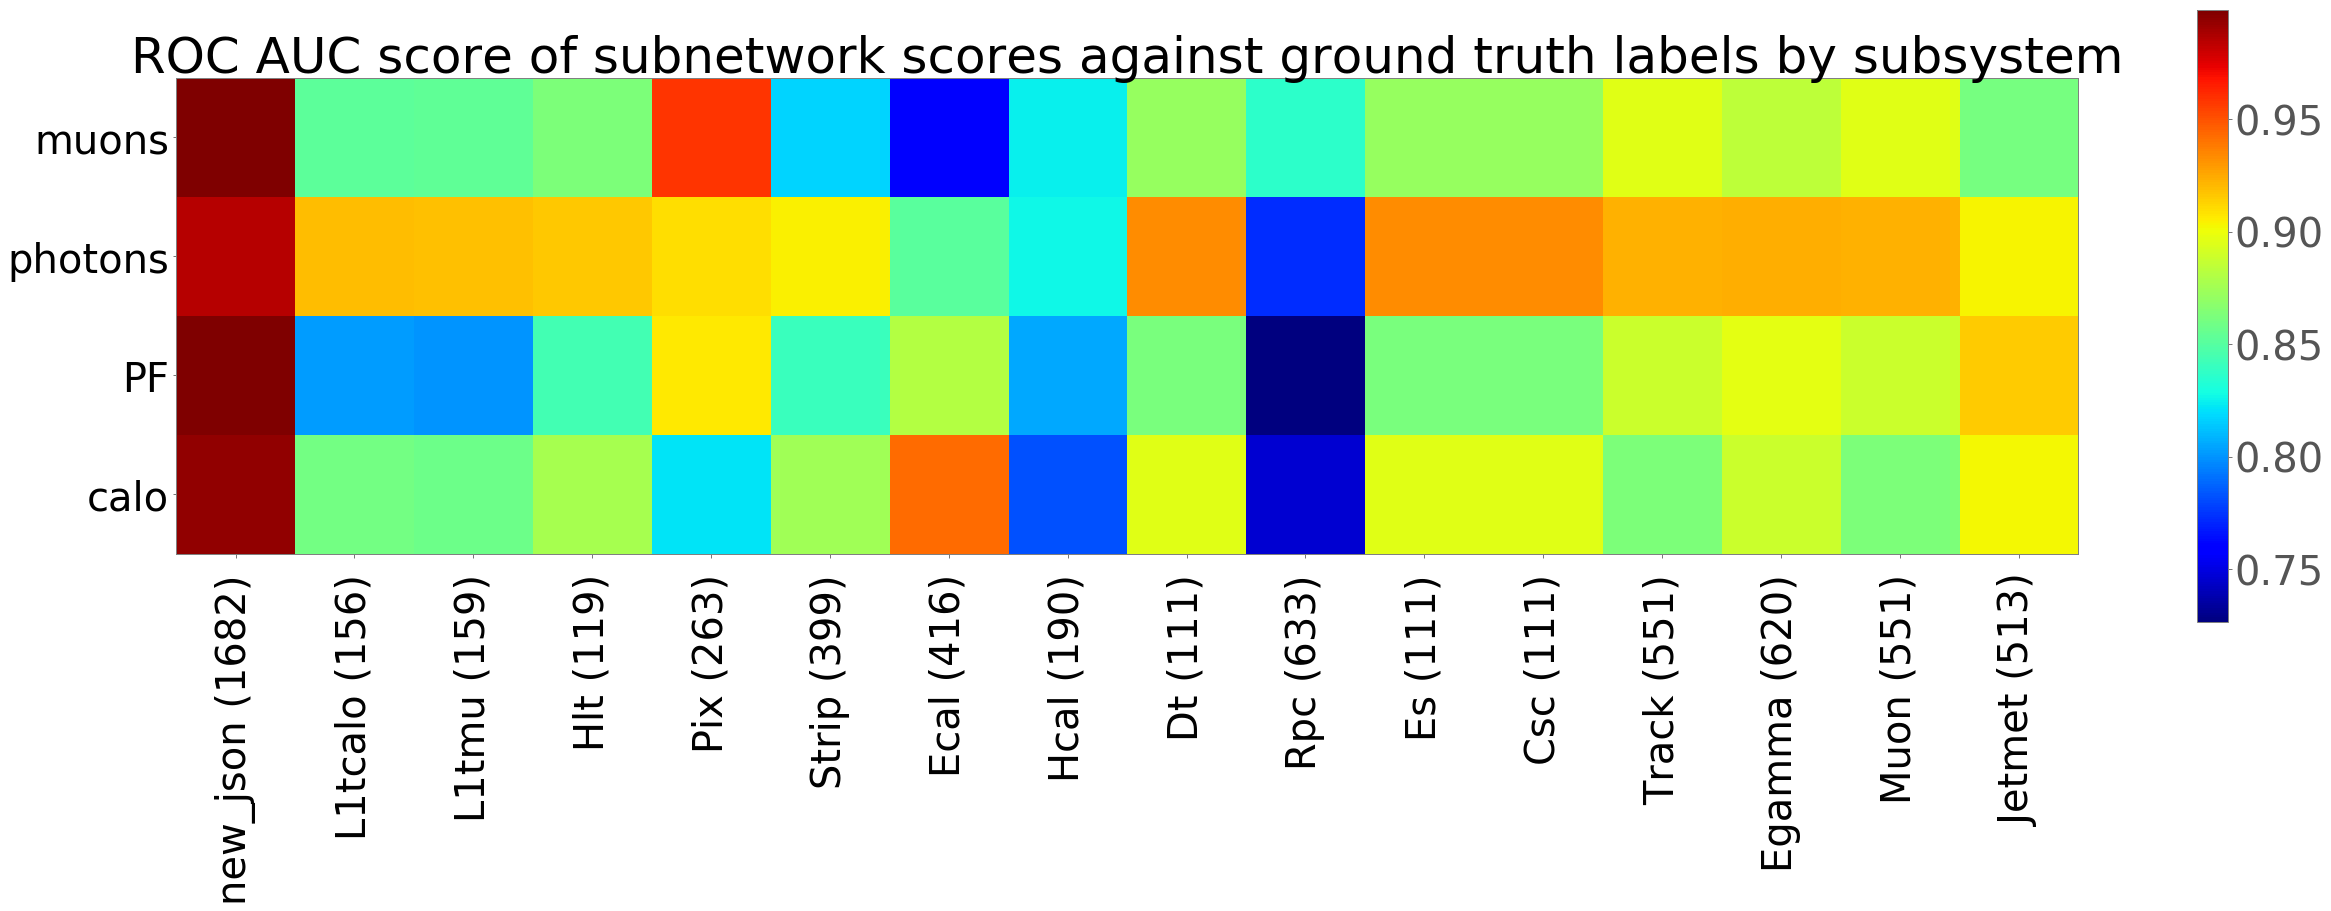

In [58]:
metric = roc_auc_score
met_name = 'roc_auc_score'
probas = probas_train
indx = indx_train



channels = networks.keys()
sub_systems = subsystemNames

aucs = np.ones(shape=(len(channels), len(sub_systems))) / 2.0

for i, channel in enumerate(channels):
    for j, sub_system in enumerate(sub_systems):
        try:
            aucs[i, j] = metric(np.array(sublabels[sub_system], 'float32')[indx], probas[channel], sample_weight=weights[indx])
            
        except Exception as e:
            print (e)
            
            
fig = plt.figure(figsize=(36, 14))

im = plt.imshow(aucs, interpolation='None', aspect=1, cmap = 'jet')
plt.colorbar(im, shrink=0.75).ax.tick_params(labelsize=40) 


plt.xticks(np.arange(len(sub_systems)), 
           [k+" ("+str(len(np.where(np.array(sublabels[k], 'float32')[indx]==0)[0]))+") " for k in sub_systems], rotation=90, fontsize=40, color = 'black')
plt.yticks(np.arange(4), [ "%s" % g for g in channels ], fontsize=40, color = 'black')
plt.title('ROC AUC score'+' of subnetwork scores against ground truth labels by subsystem', fontsize=50)
plt.grid(False)
plt.tight_layout()

plt.show()

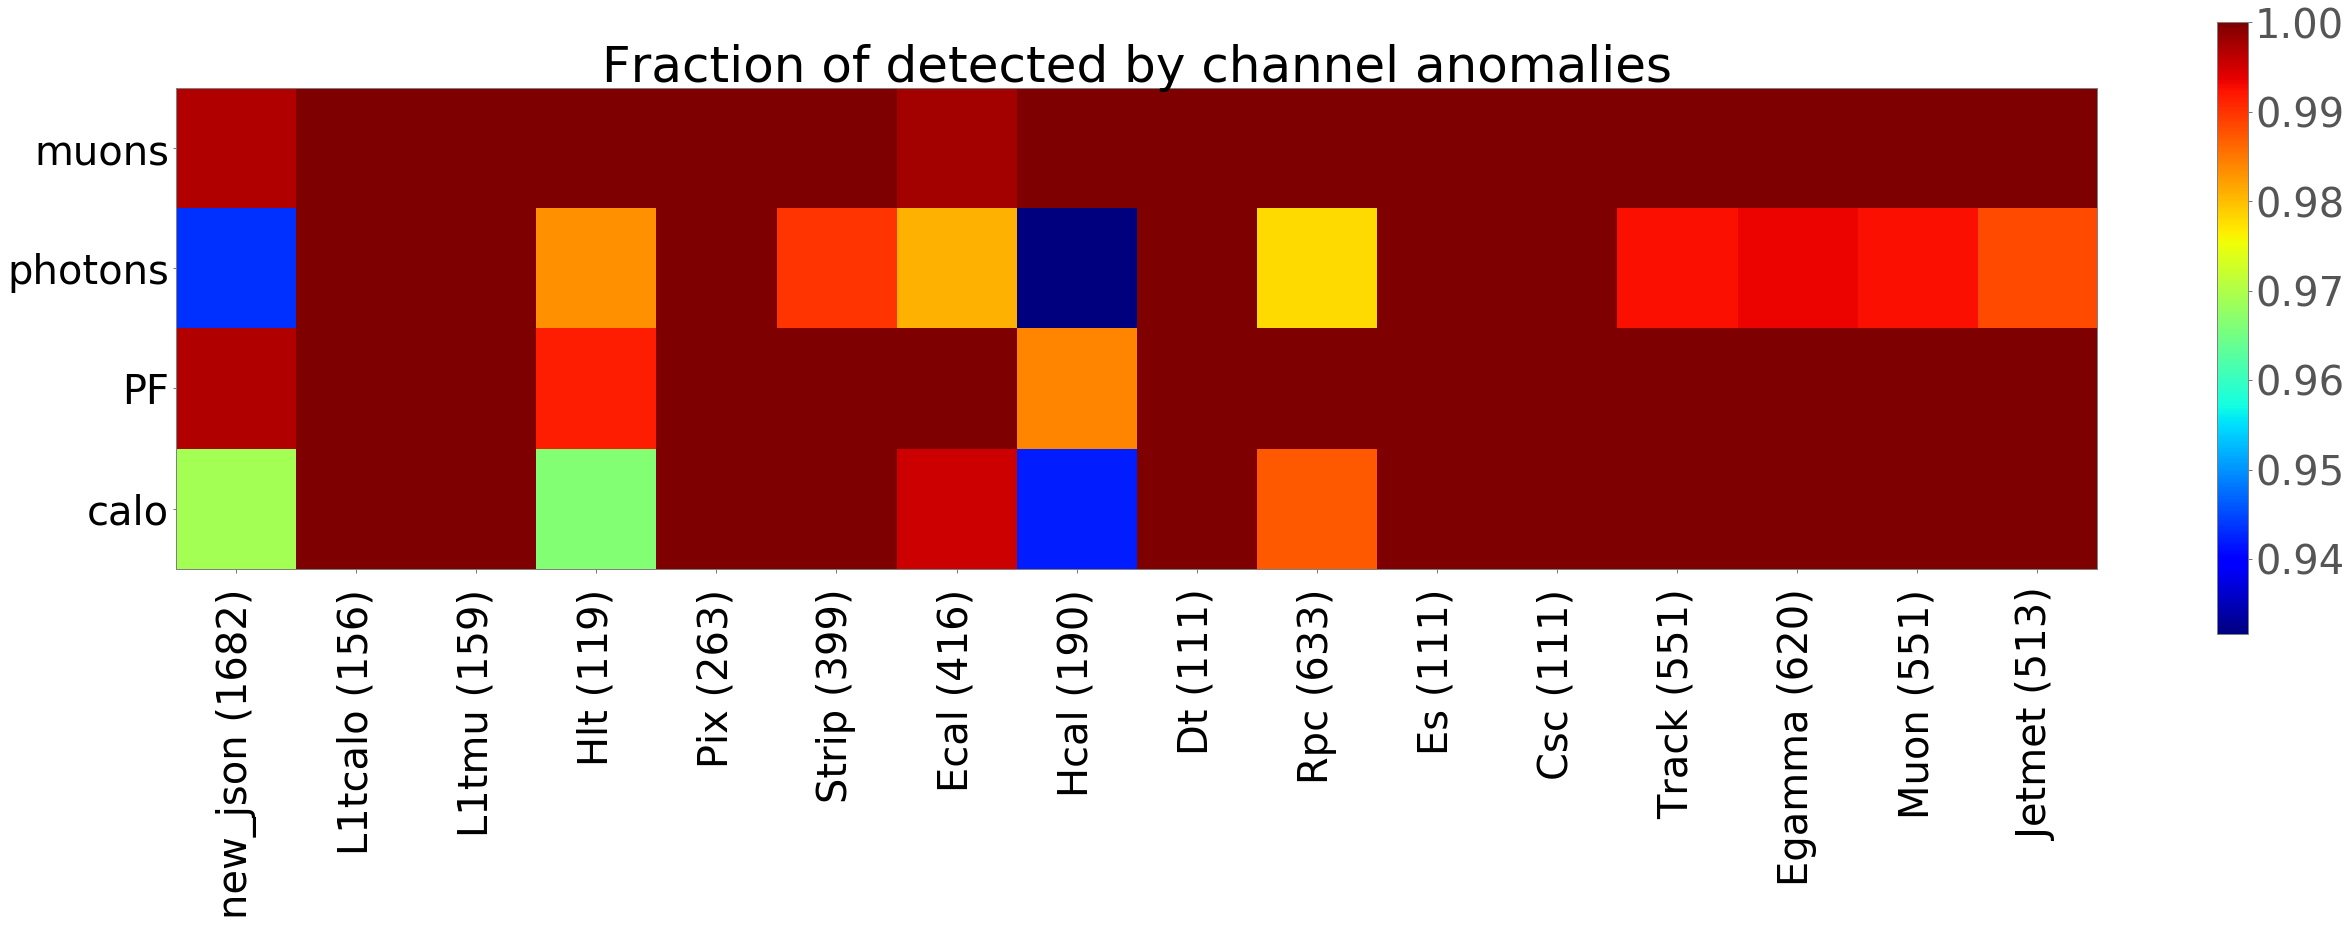

In [59]:
##train
indx = indx_train
probas = probas_train

fr = np.ones(shape=(len(channels), len(subsystemNames))) / 2.0

for i, channel in enumerate(channels):
    for j, sub_system in enumerate(subsystemNames):
        try:
            sub_lb = np.array(sublabels[sub_system], 'float32')[indx]
            round_probas = list(map( round,probas[channel]))
            
            fr[i, j] = np.float(len(np.where((round_probas == sub_lb)&(sub_lb==0))[0]))/len(np.where(sub_lb==0)[0])
            

        except Exception as e:
            print (e)
            
            
fig = plt.figure(figsize=(36, 14))

im = plt.imshow(fr, interpolation='None', aspect=1, cmap = 'jet')
plt.colorbar(im, shrink=0.75).ax.tick_params(labelsize=40) 


plt.xticks(np.arange(len(sub_systems)), 
           [k+" ("+str(len(np.where(np.array(sublabels[k], 'float32')[indx]==0)[0]))+") " for k in sub_systems], rotation=90, fontsize=40, color = 'black')
plt.yticks(np.arange(4), [ "%s" % g for g in channels ], fontsize=40, color = 'black')
plt.title('Fraction of detected by channel anomalies', fontsize=50)
plt.grid(False)
plt.tight_layout()

plt.show()

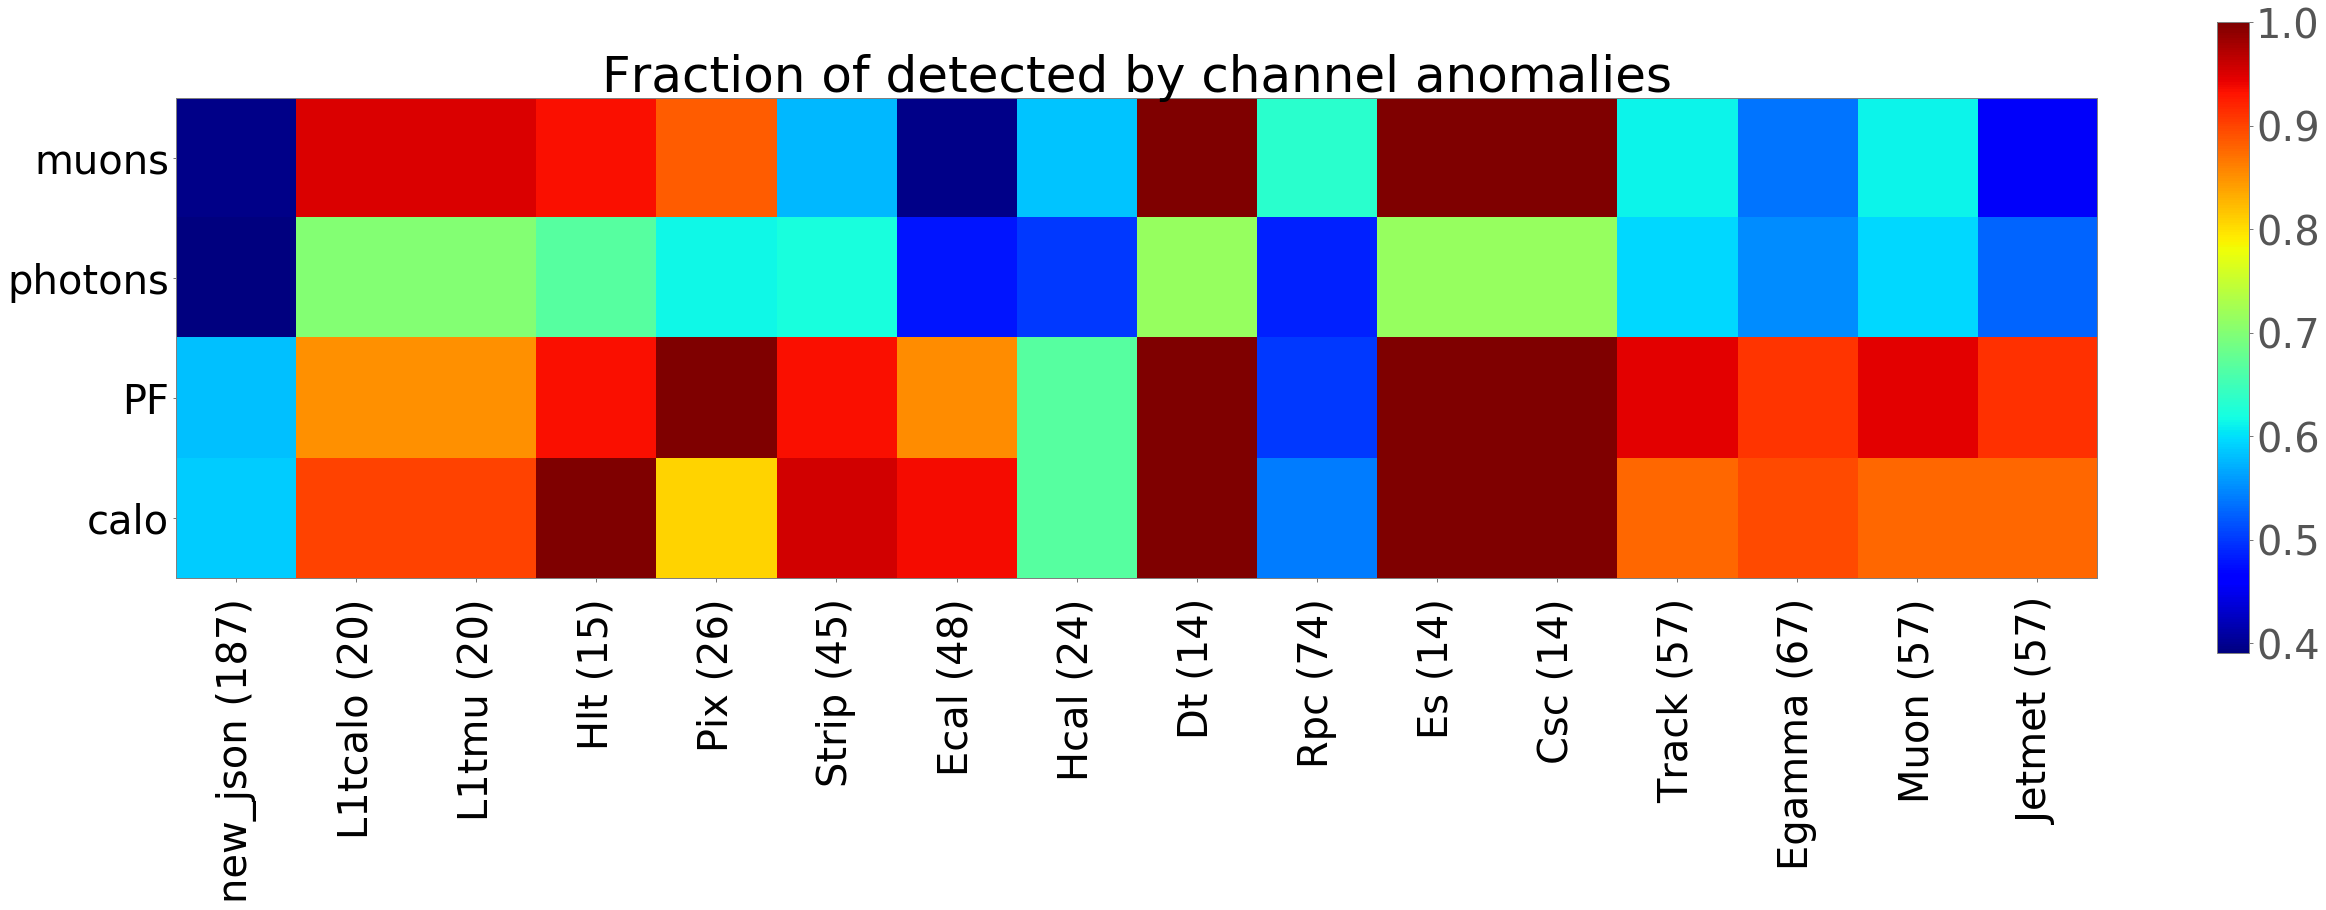

In [60]:
##train
indx = indx_val
probas = probas_val

fr = np.ones(shape=(len(channels), len(subsystemNames))) / 2.0

for i, channel in enumerate(channels):
    for j, sub_system in enumerate(subsystemNames):
        try:
            sub_lb = np.array(sublabels[sub_system], 'float32')[indx]
            round_probas = list(map( round,probas[channel]))
            
            fr[i, j] = np.float(len(np.where((round_probas == sub_lb)&(sub_lb==0))[0]))/len(np.where(sub_lb==0)[0])
            

        except Exception as e:
            print (e)
            
            
fig = plt.figure(figsize=(36, 14))

im = plt.imshow(fr, interpolation='None', aspect=1, cmap = 'jet')
plt.colorbar(im, shrink=0.75).ax.tick_params(labelsize=40) 


plt.xticks(np.arange(len(sub_systems)), 
           [k+" ("+str(len(np.where(np.array(sublabels[k], 'float32')[indx]==0)[0]))+") " for k in sub_systems], rotation=90, fontsize=40, color = 'black')
plt.yticks(np.arange(4), [ "%s" % g for g in channels ], fontsize=40, color = 'black')
plt.title('Fraction of detected by channel anomalies', fontsize=50)
plt.grid(False)
plt.tight_layout()

plt.show()

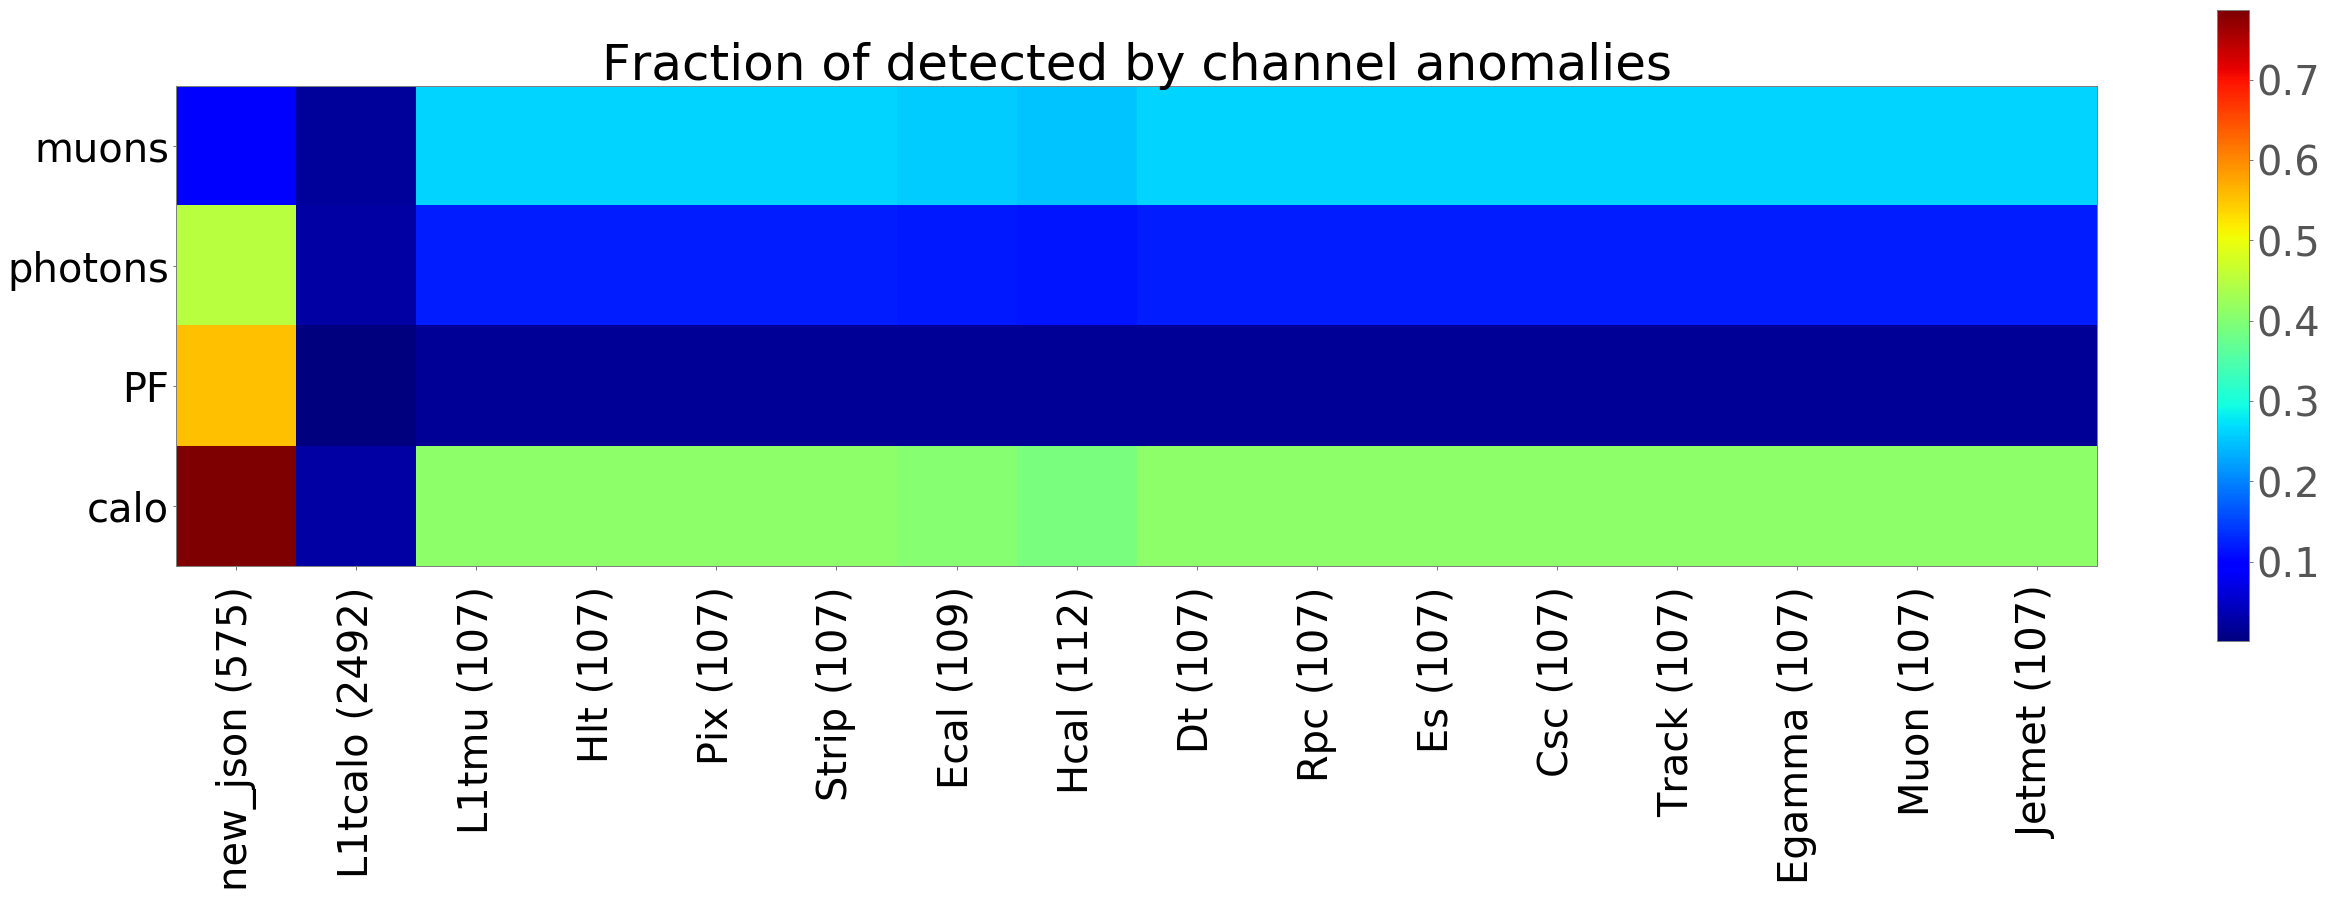

In [61]:
##train
indx = indx_test
probas = probas_test

fr = np.ones(shape=(len(channels), len(subsystemNames))) / 2.0

for i, channel in enumerate(channels):
    for j, sub_system in enumerate(subsystemNames):
        try:
            sub_lb = np.array(sublabels[sub_system], 'float32')[indx]
            round_probas = list(map( round,probas[channel]))
            
            fr[i, j] = np.float(len(np.where((round_probas == sub_lb)&(sub_lb==0))[0]))/len(np.where(sub_lb==0)[0])
            

        except Exception as e:
            print (e)
            
            
fig = plt.figure(figsize=(36, 14))

im = plt.imshow(fr, interpolation='None', aspect=1, cmap = 'jet')
plt.colorbar(im, shrink=0.75).ax.tick_params(labelsize=40) 


plt.xticks(np.arange(len(sub_systems)), 
           [k+" ("+str(len(np.where(np.array(sublabels[k], 'float32')[indx]==0)[0]))+") " for k in sub_systems], rotation=90, fontsize=40, color = 'black')
plt.yticks(np.arange(4), [ "%s" % g for g in channels ], fontsize=40, color = 'black')
plt.title('Fraction of detected by channel anomalies', fontsize=50)
plt.grid(False)
plt.tight_layout()

plt.show()

In [62]:
min_subsys = np.array(np.min(sublabels[subsystemNames[1:]+["Lumi"]], axis=1))

In [63]:
len(np.where(min_subsys!=np.array(sublabels['new_json']))[0])

3131

In [64]:
3131./data_features.shape[0]

0.019209767470396957

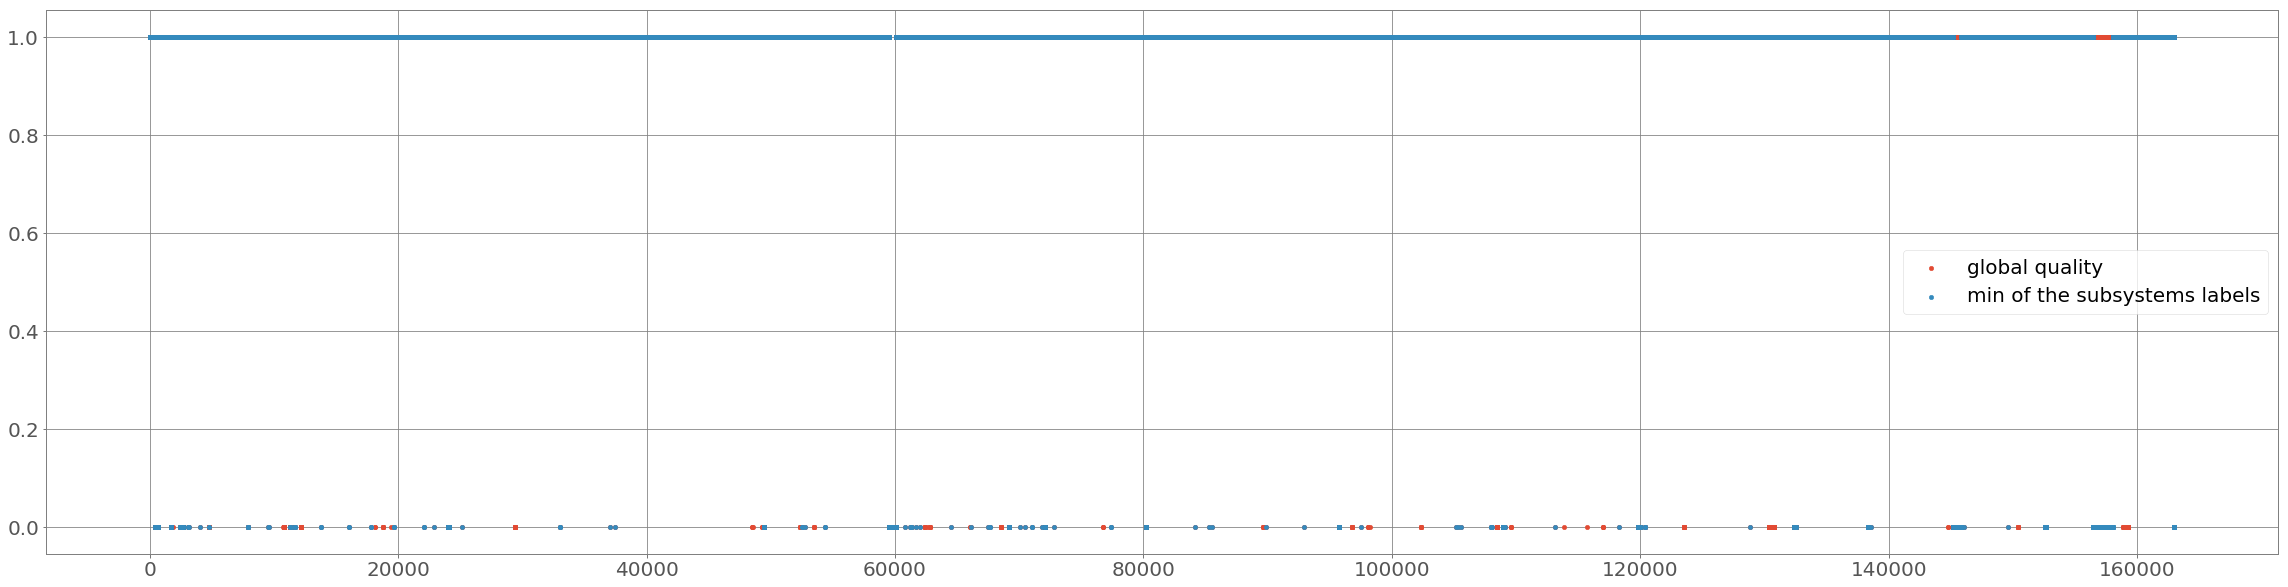

In [65]:
fig = plt.figure(figsize=(40, 10))
plt.scatter(np.arange(data_features.shape[0]),sublabels['new_json'], label='global quality', s=20.)
plt.scatter(np.arange(data_features.shape[0]),min_subsys, label="min of the subsystems labels", s=20.)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

new_json


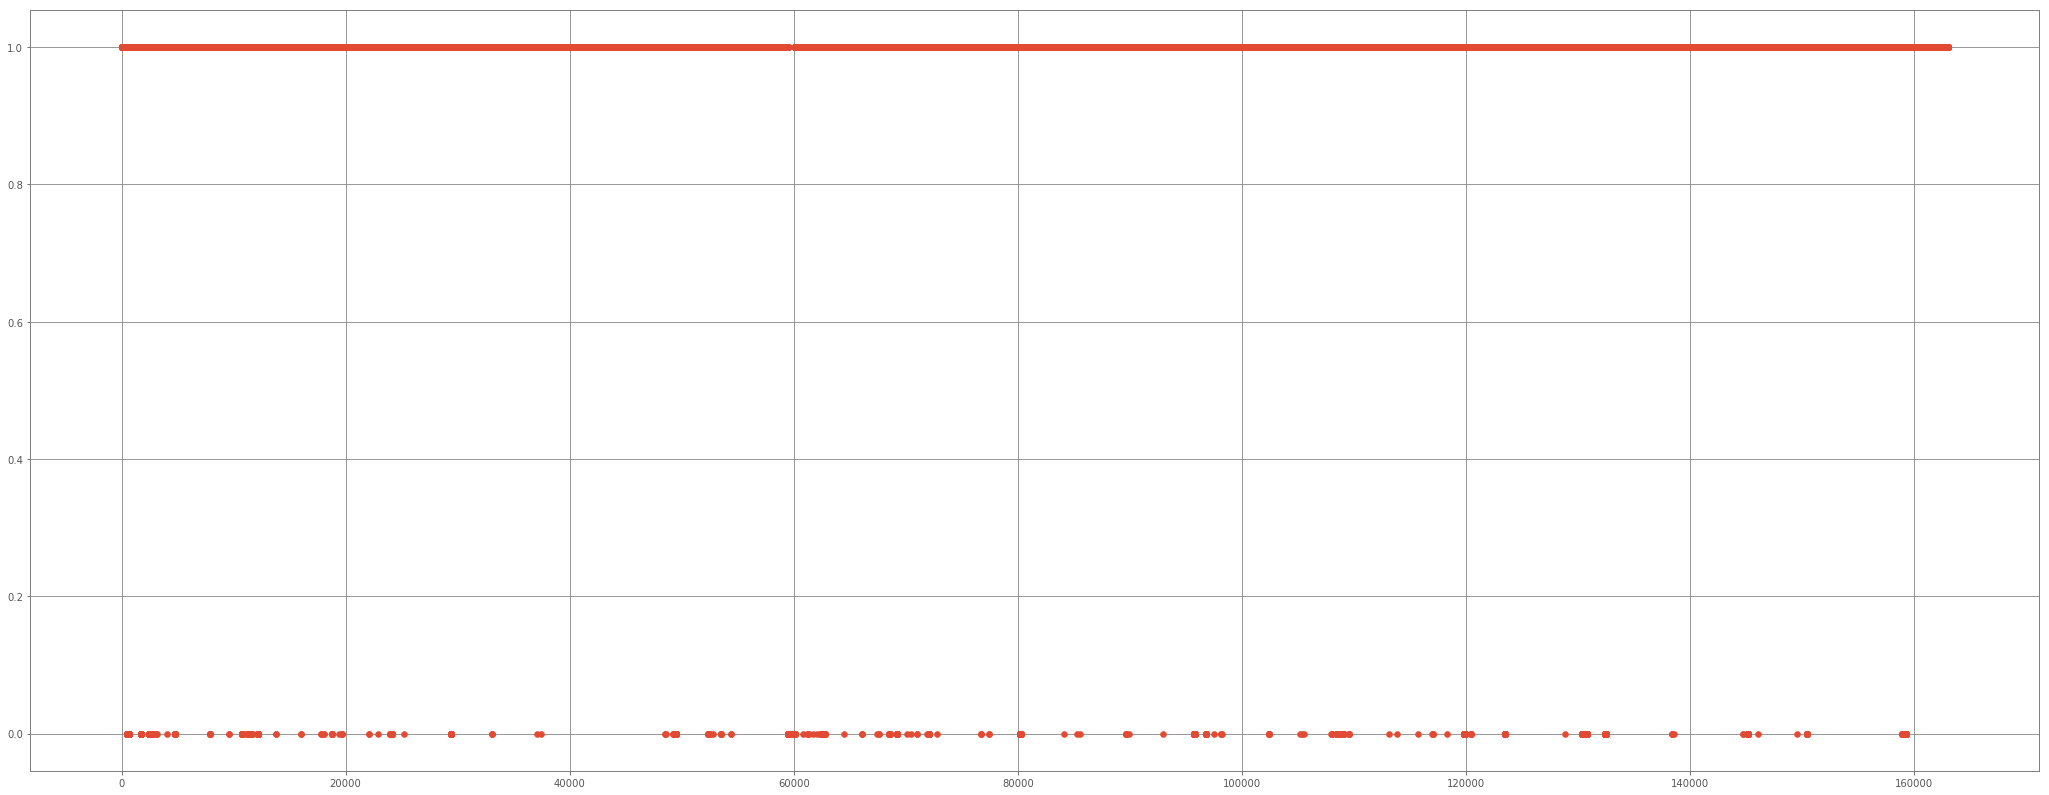

L1tcalo


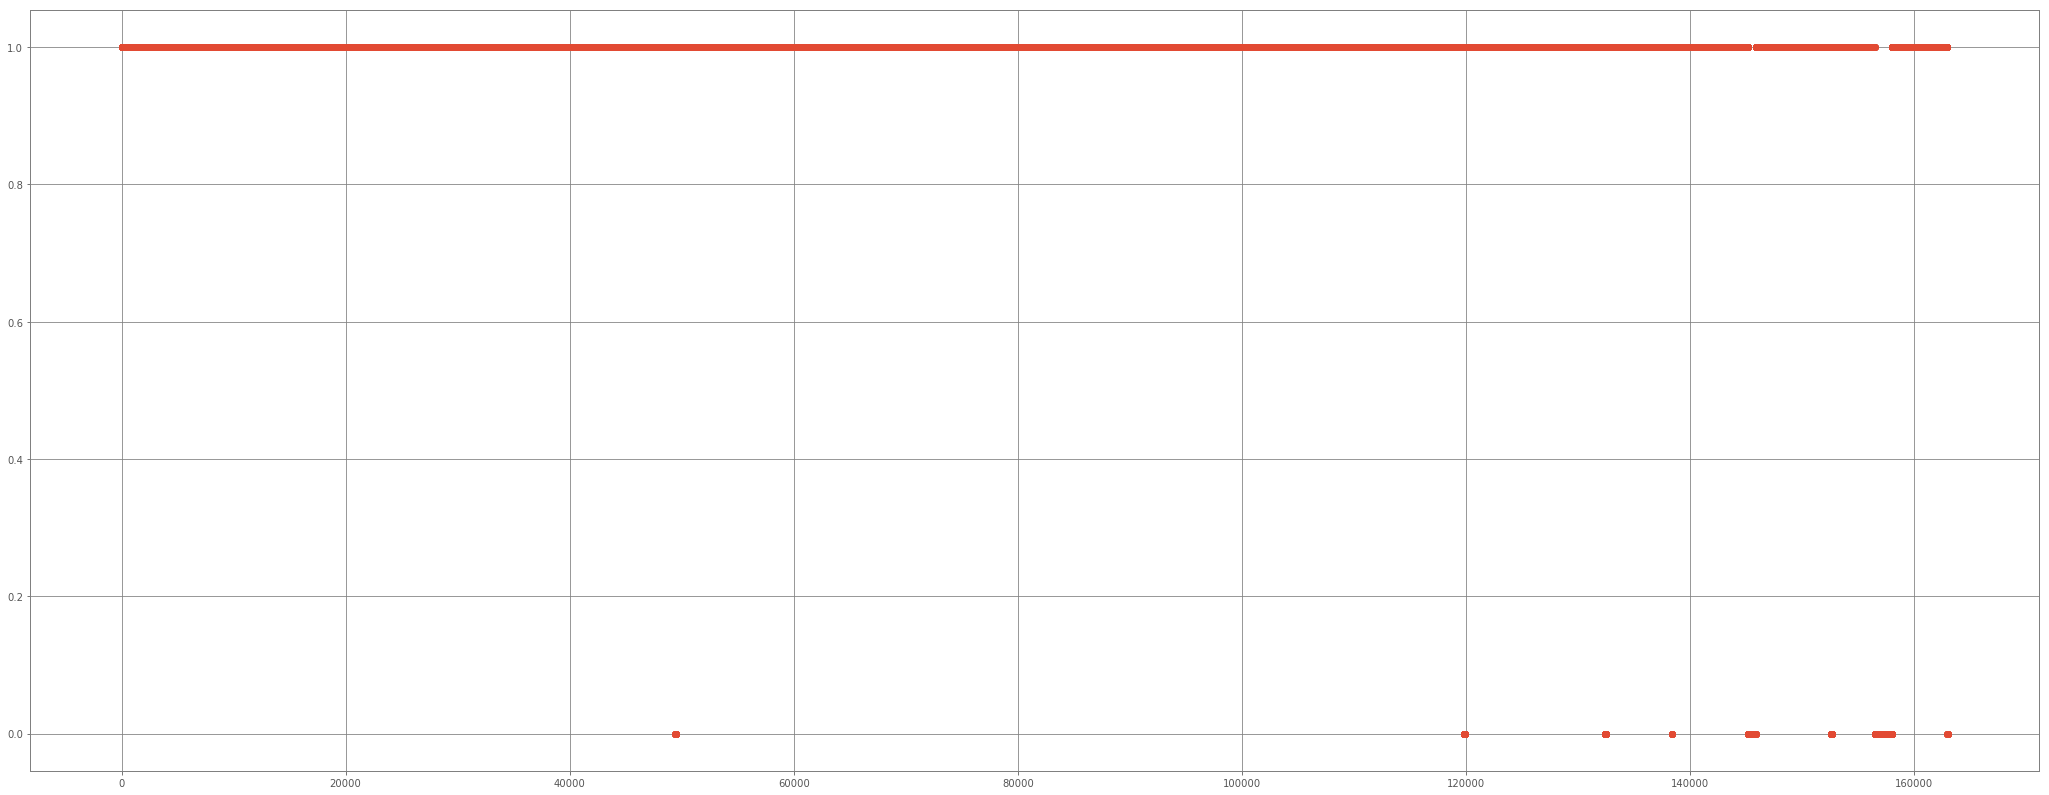

L1tmu


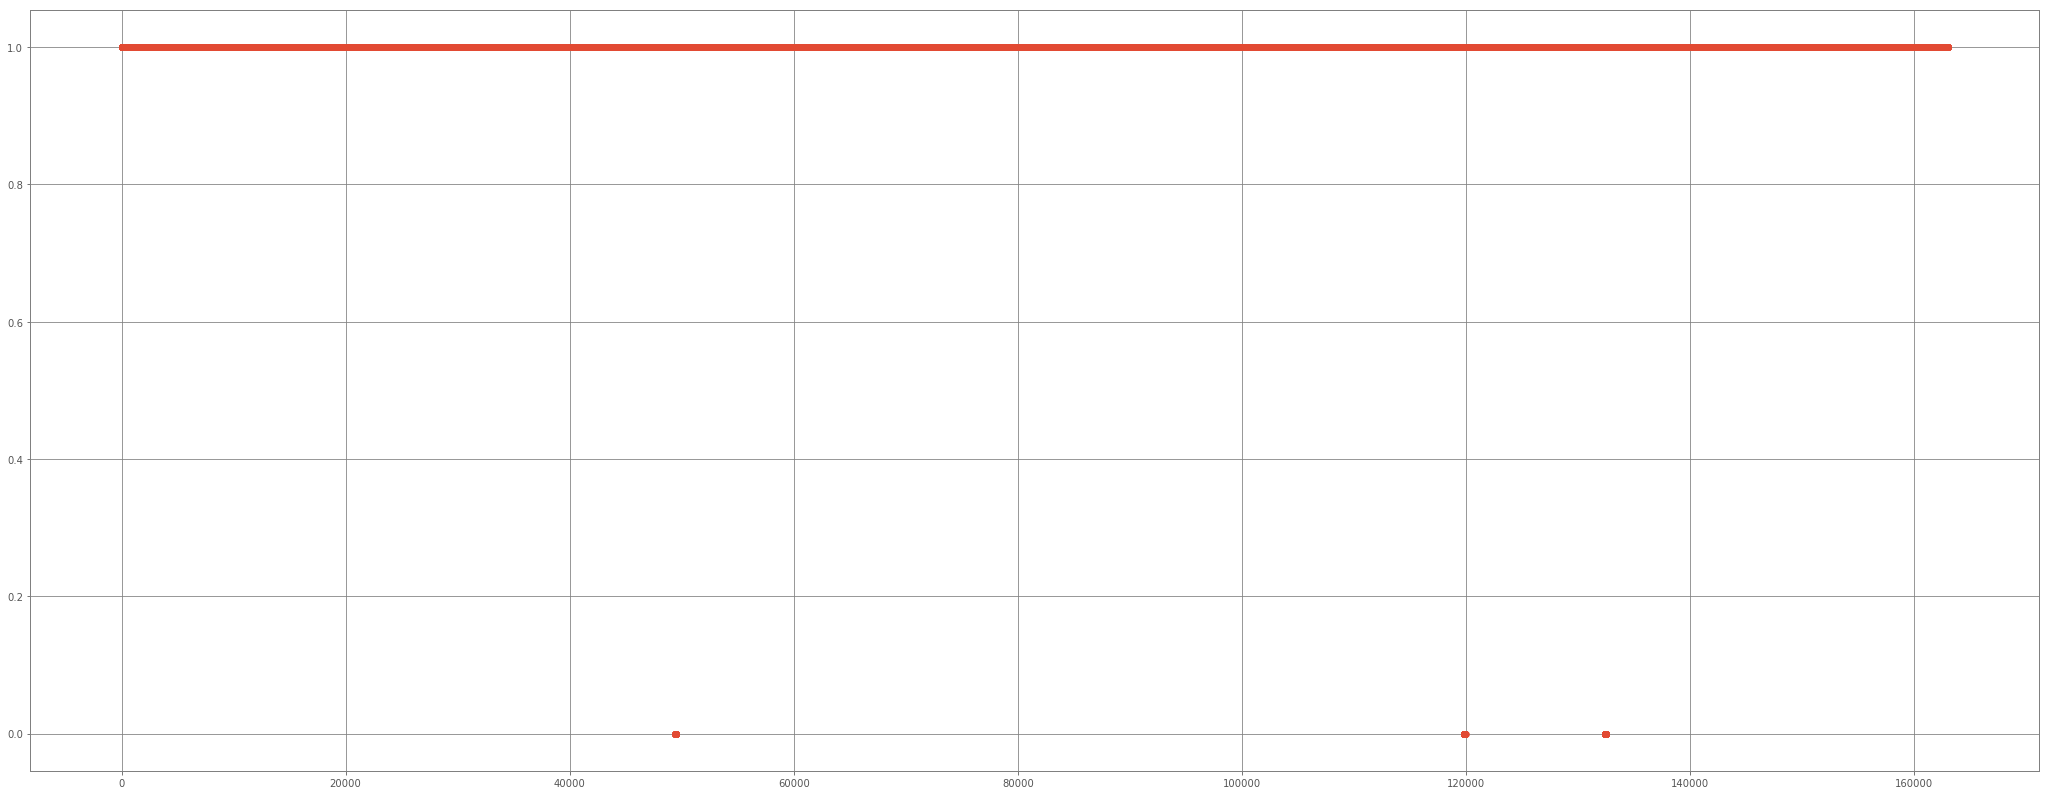

Hlt


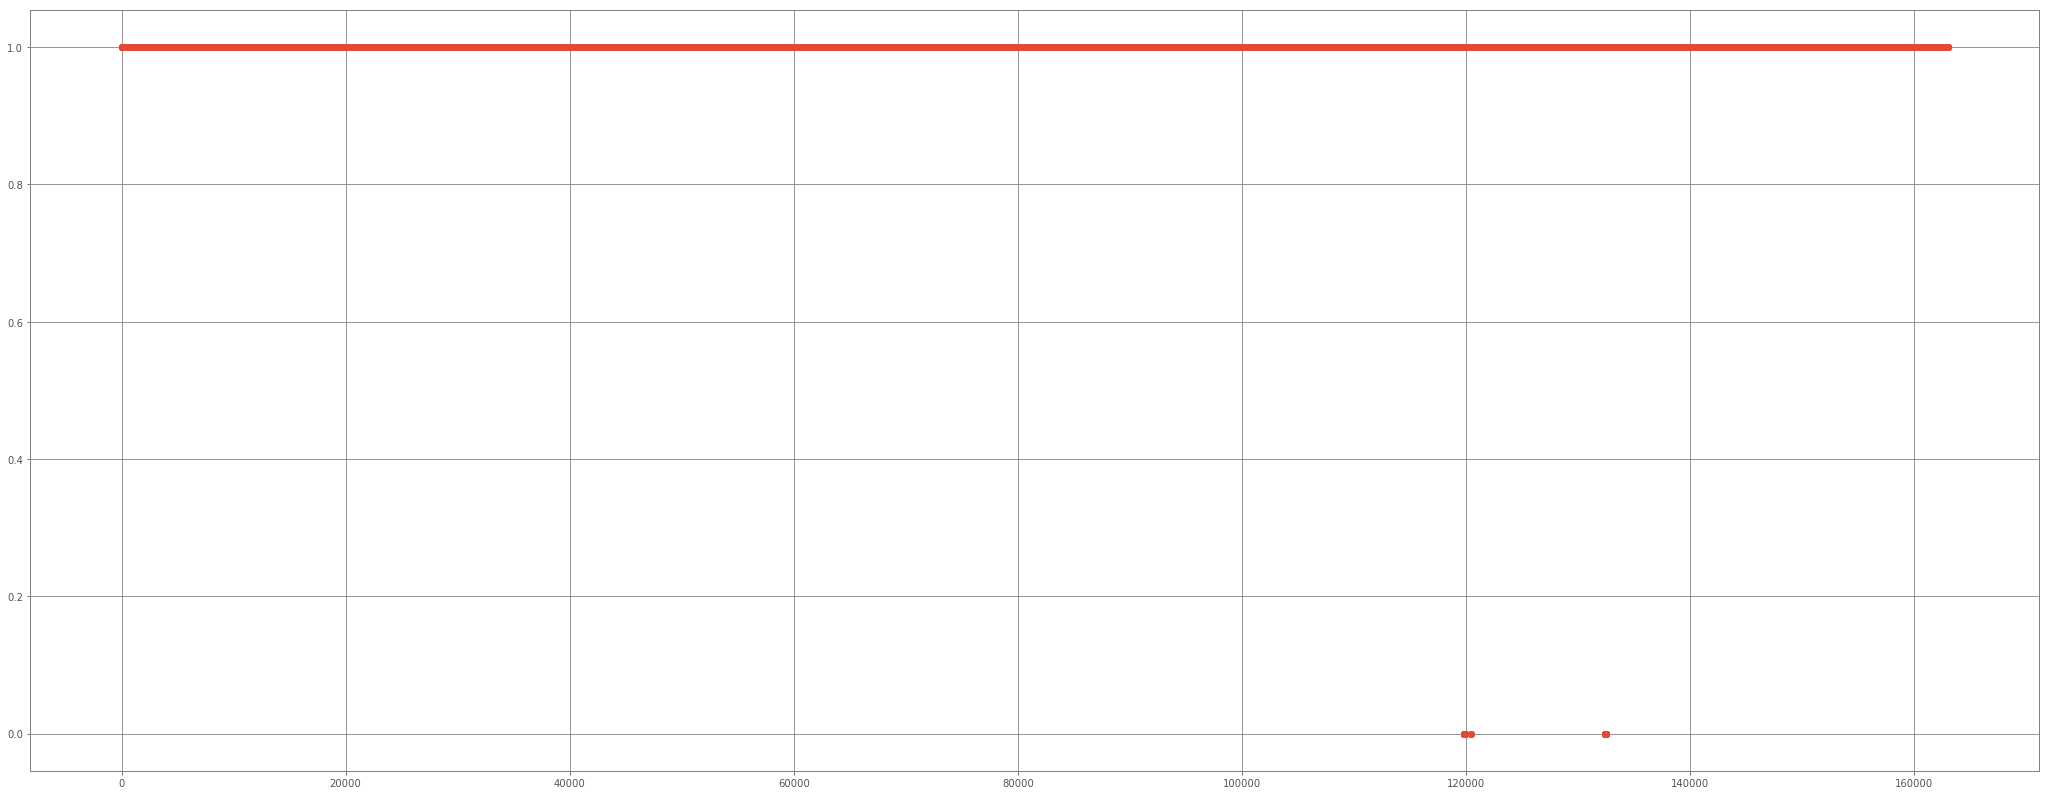

Pix


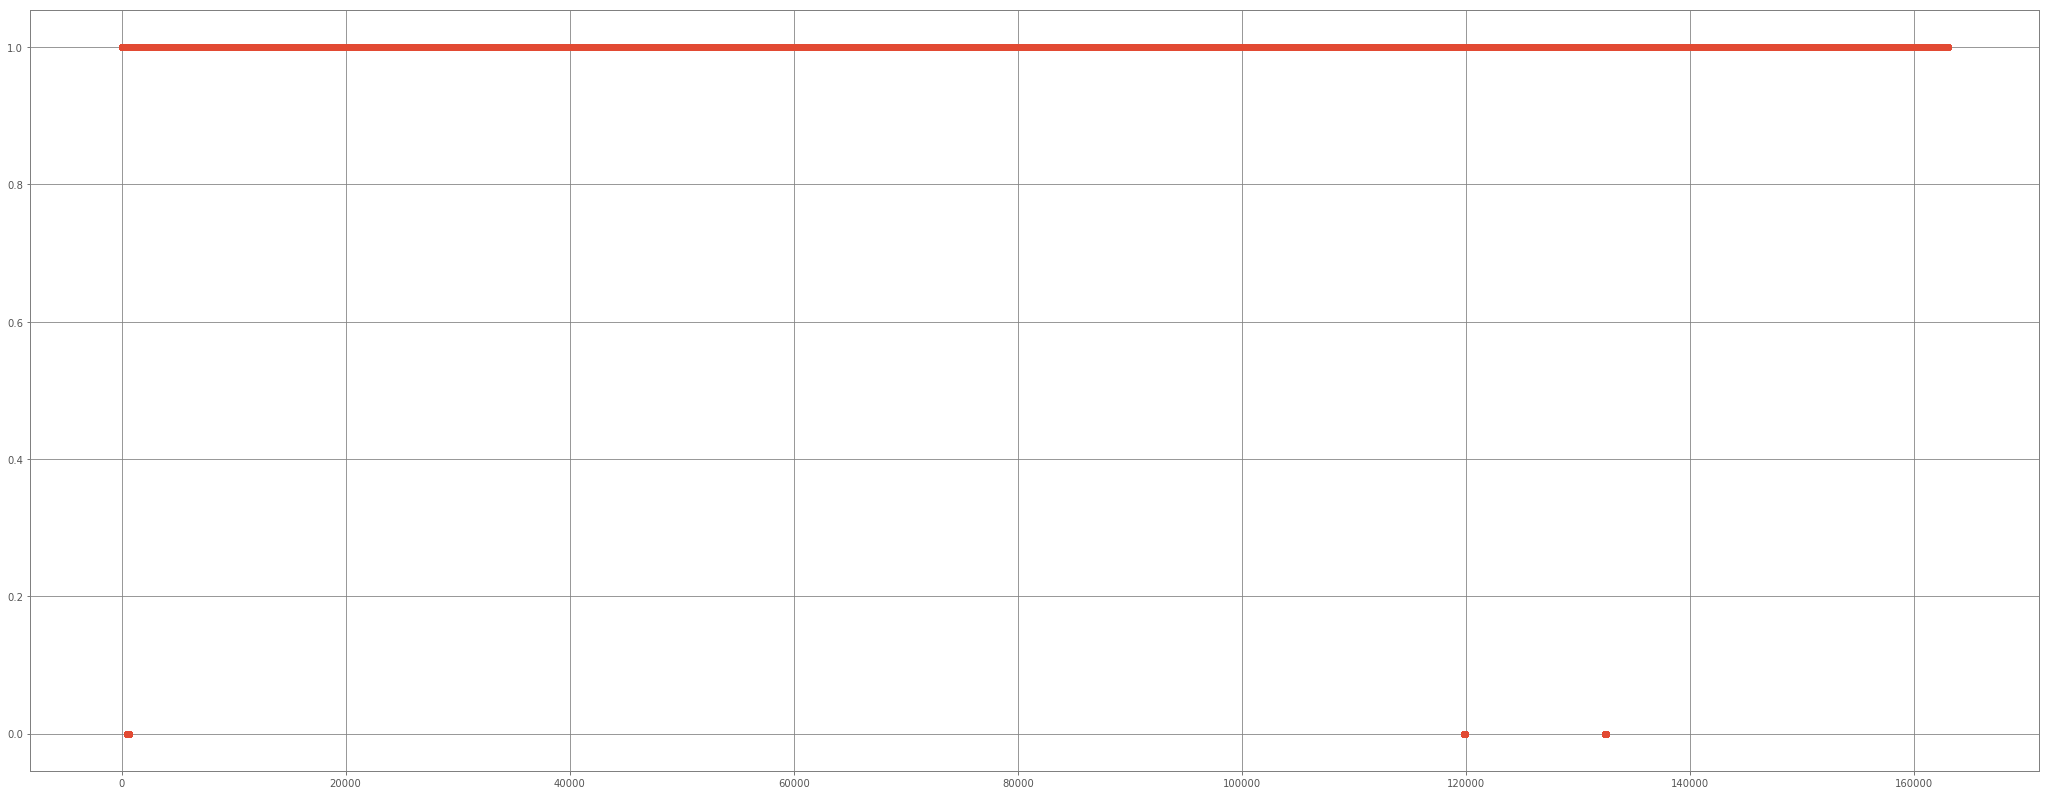

Strip


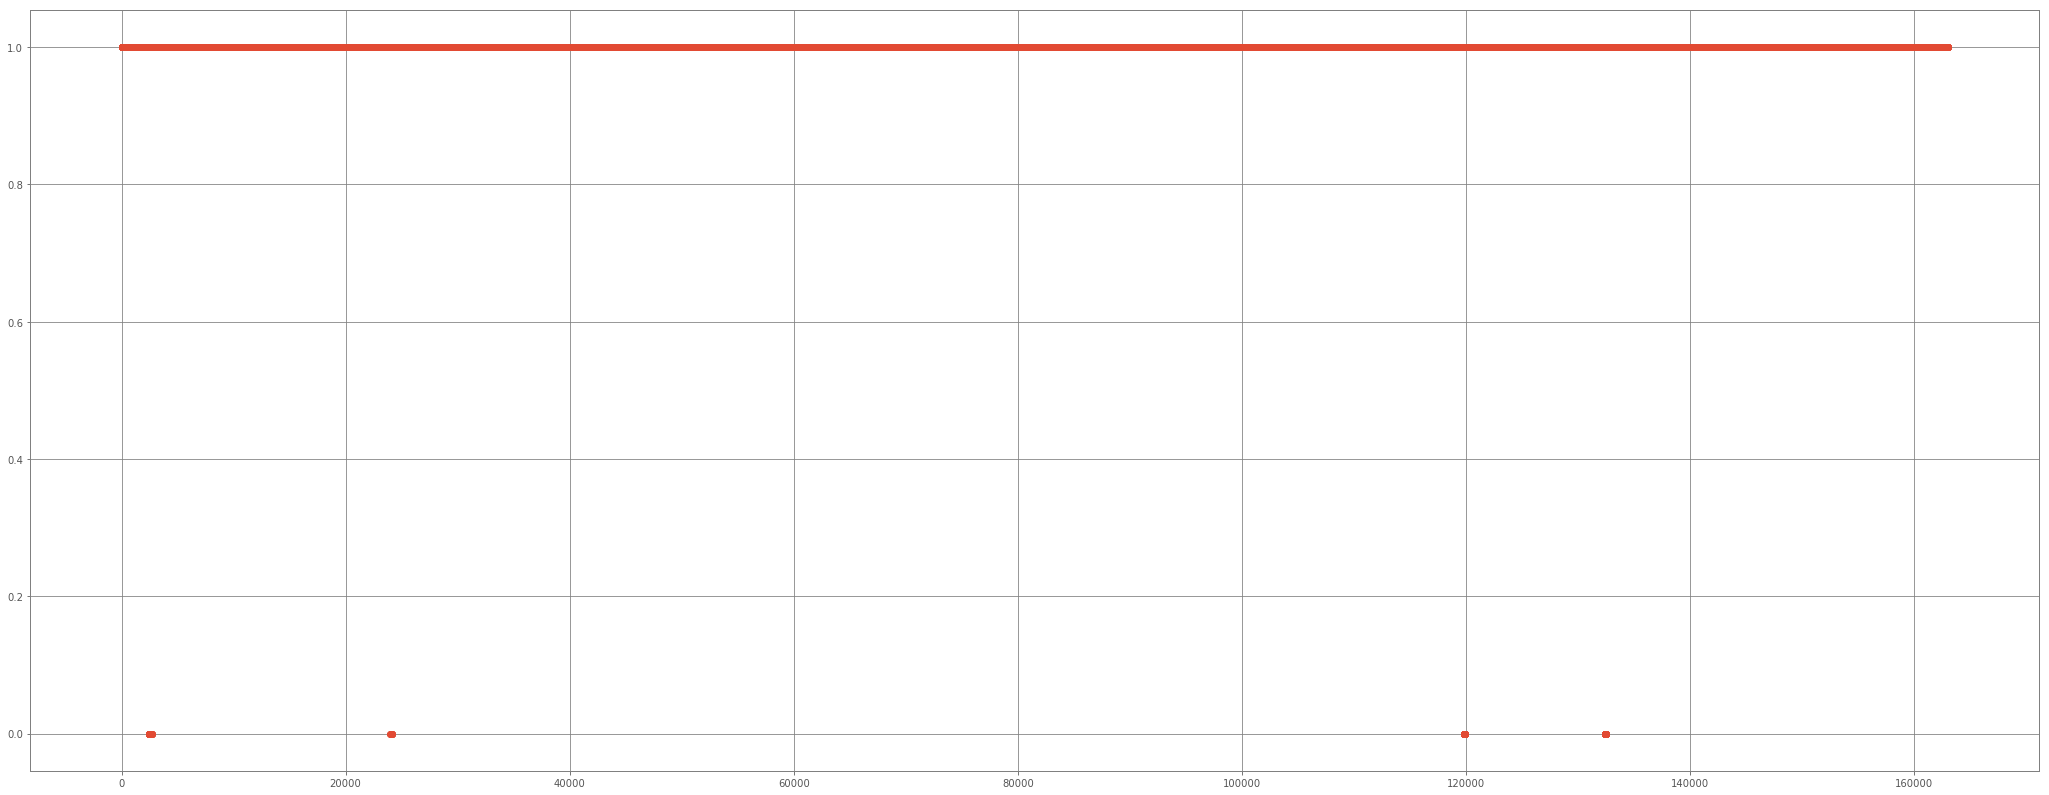

Ecal


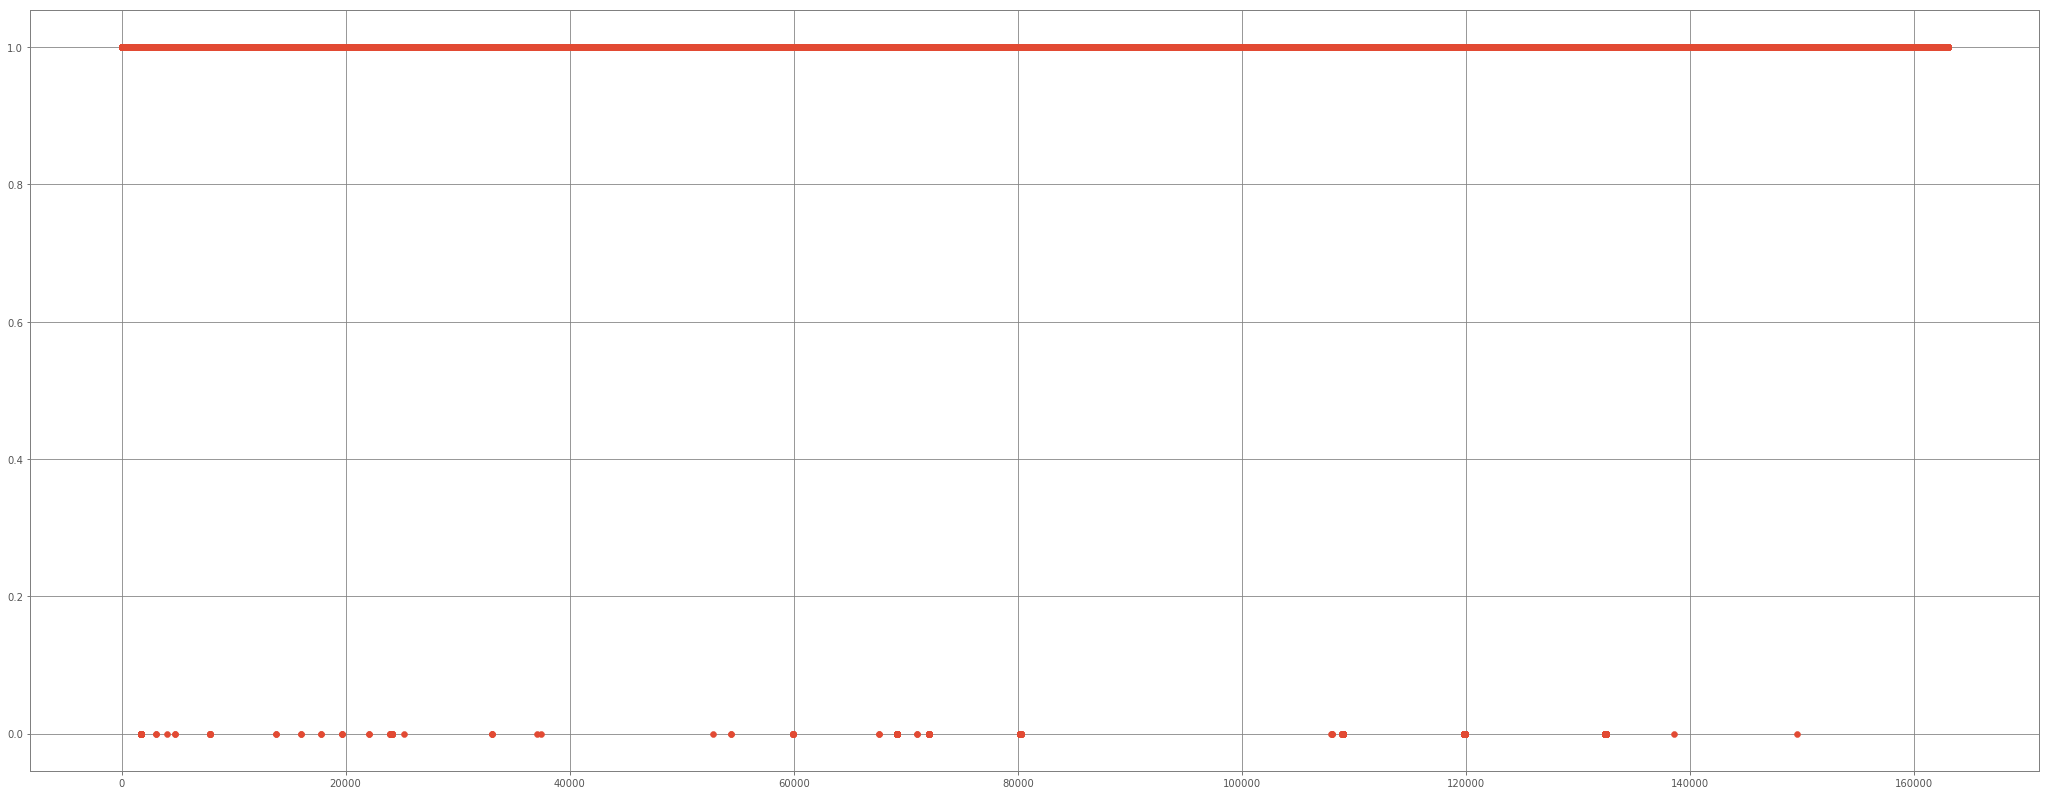

Hcal


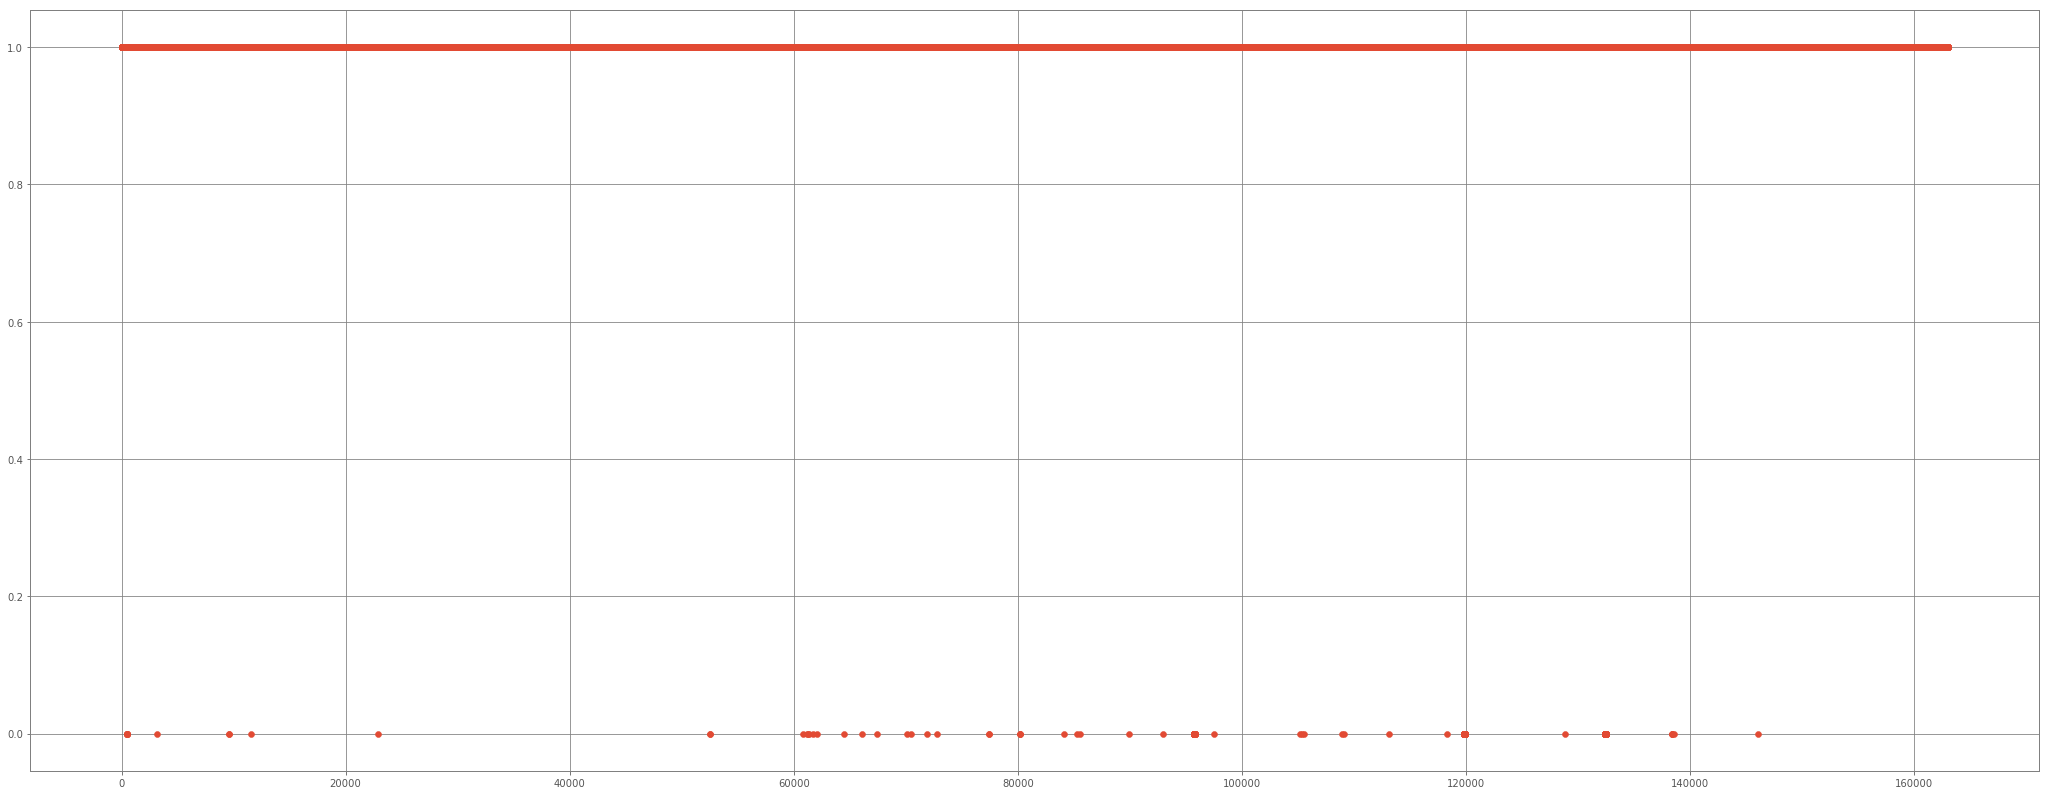

Dt


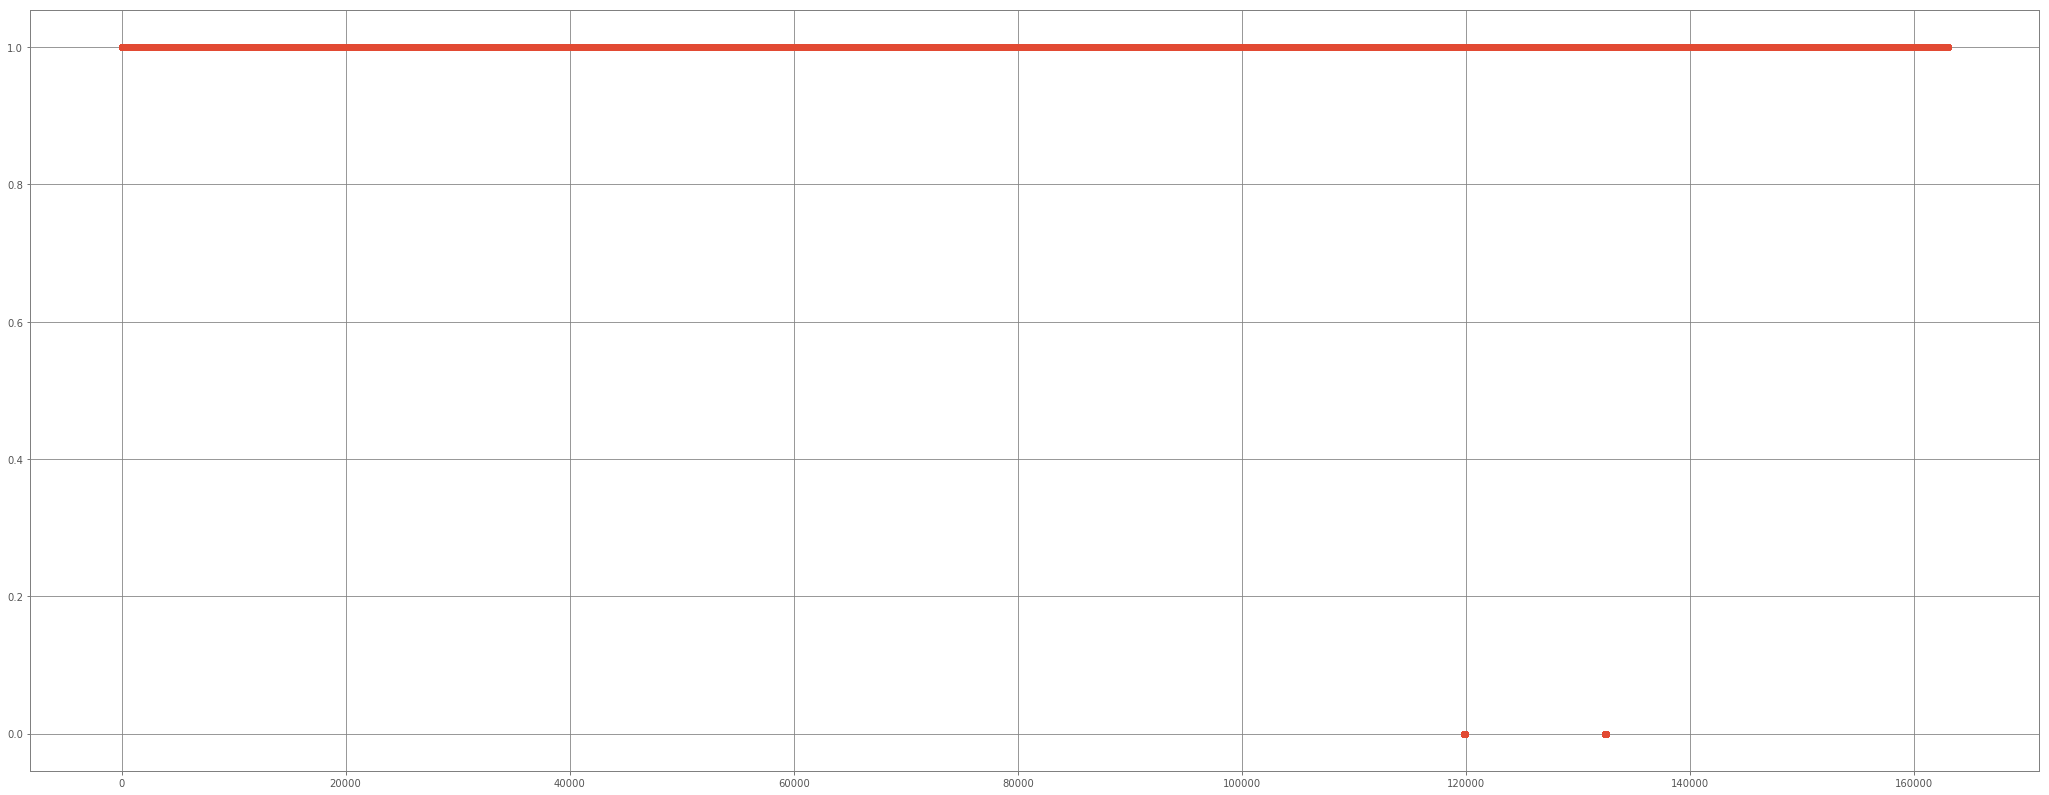

Rpc


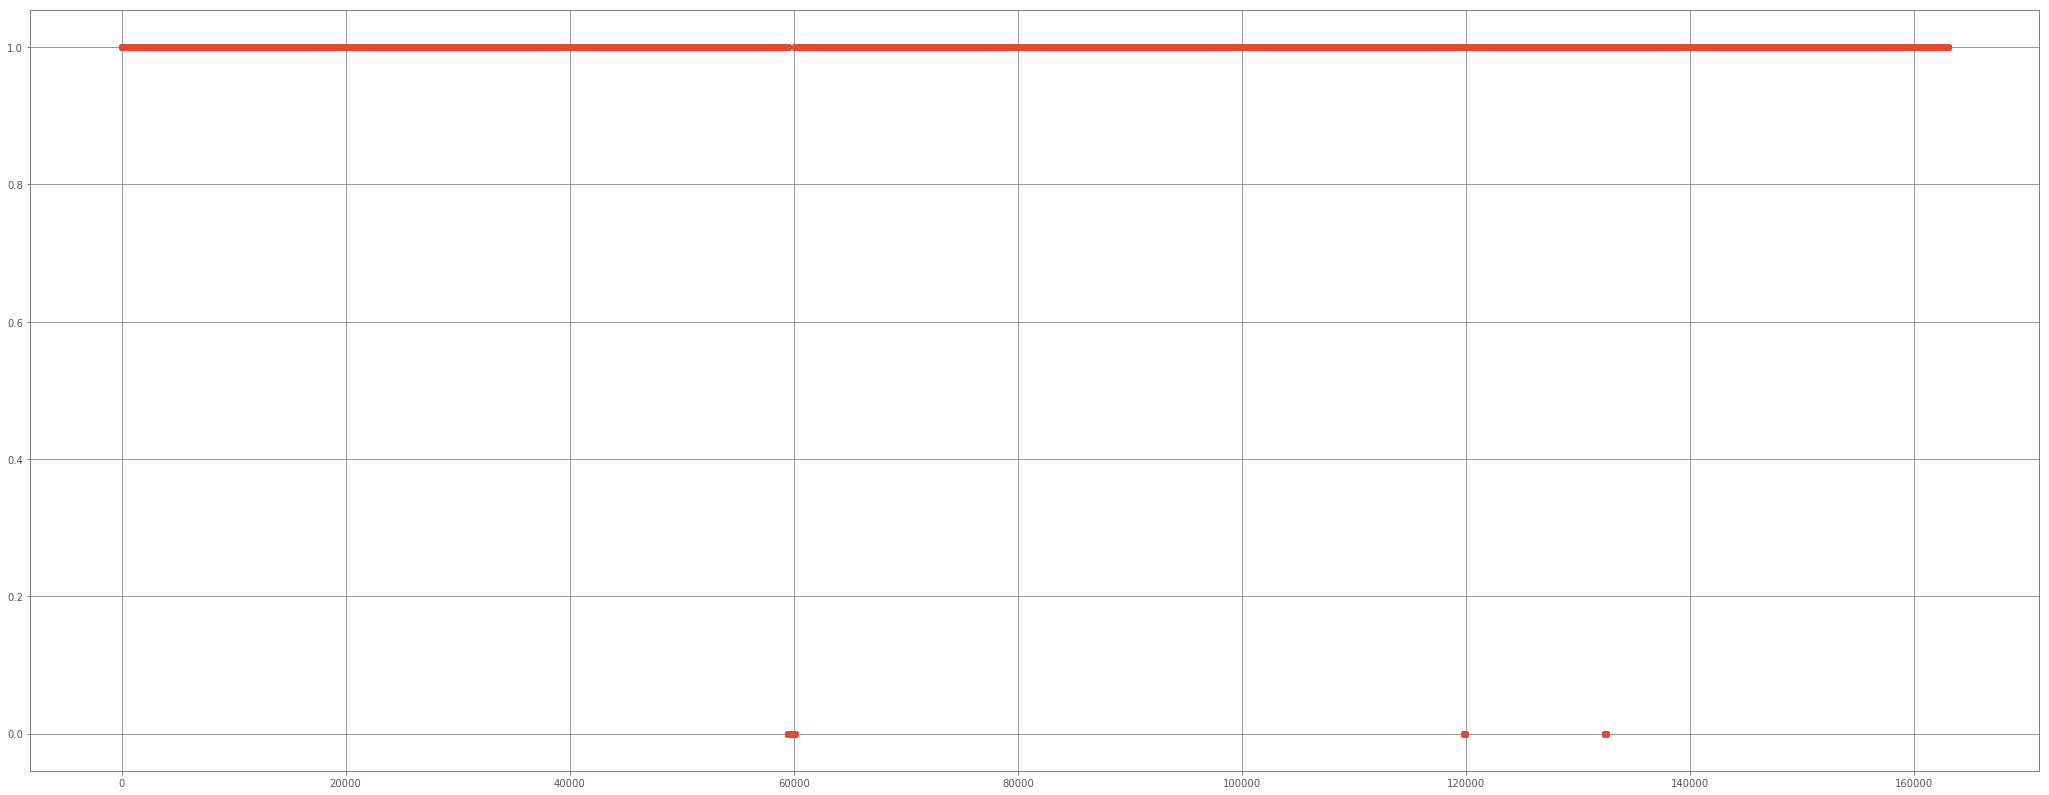

Es


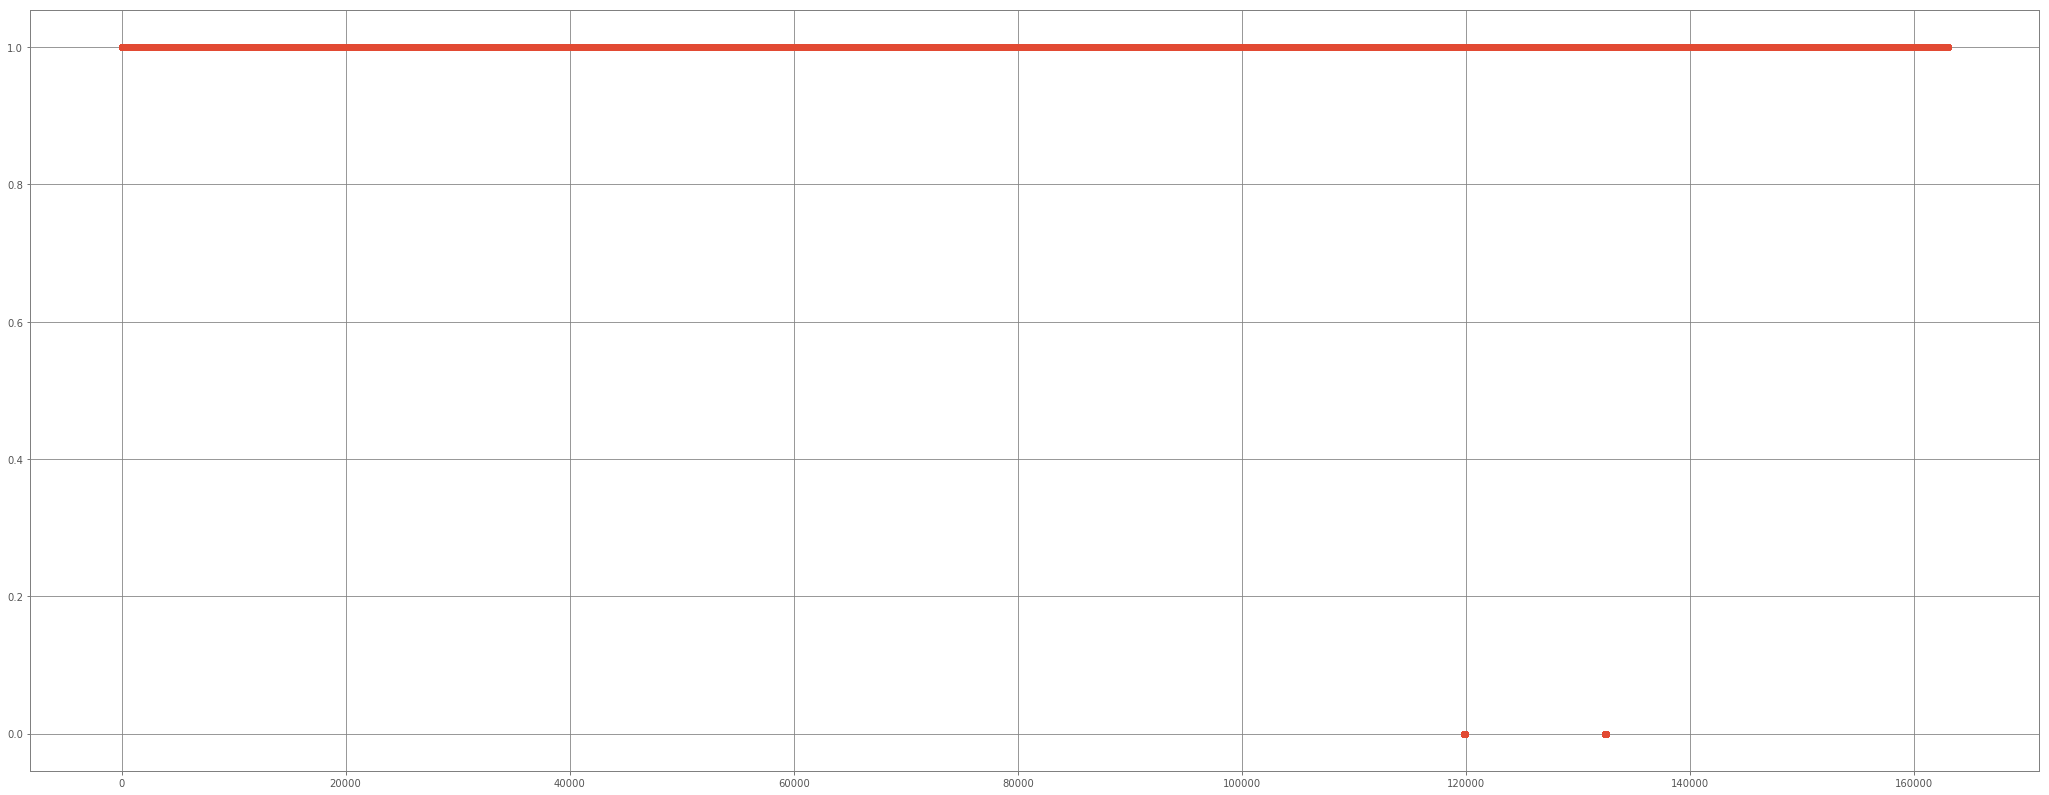

Csc


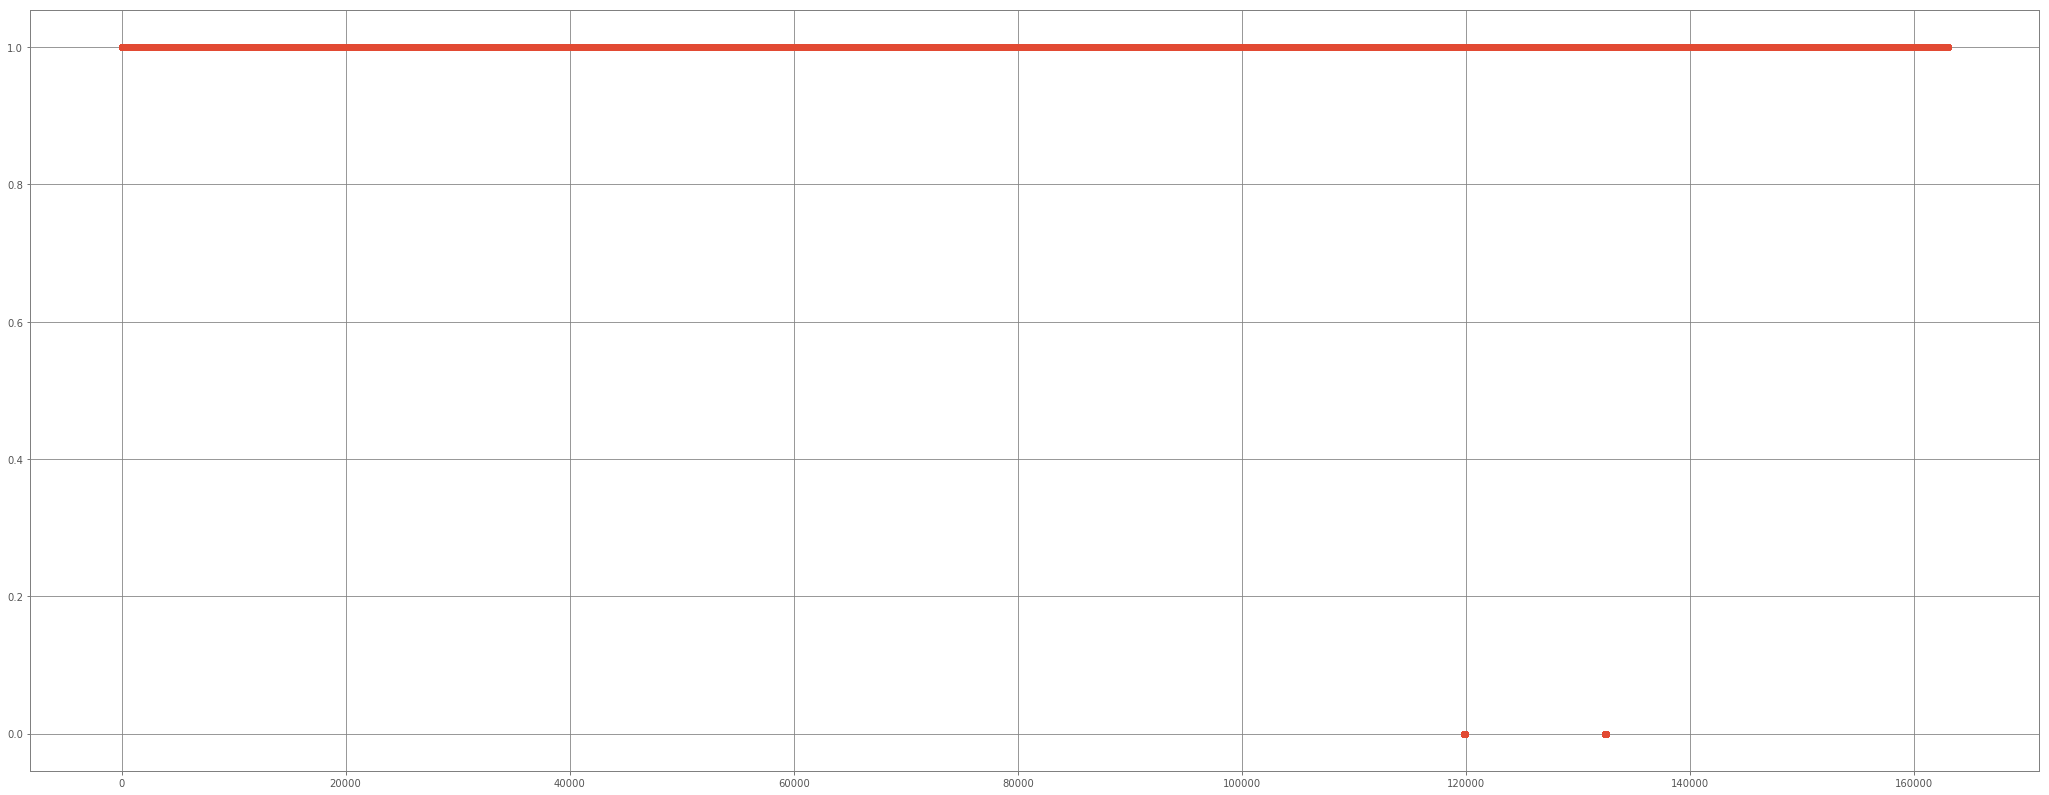

Track


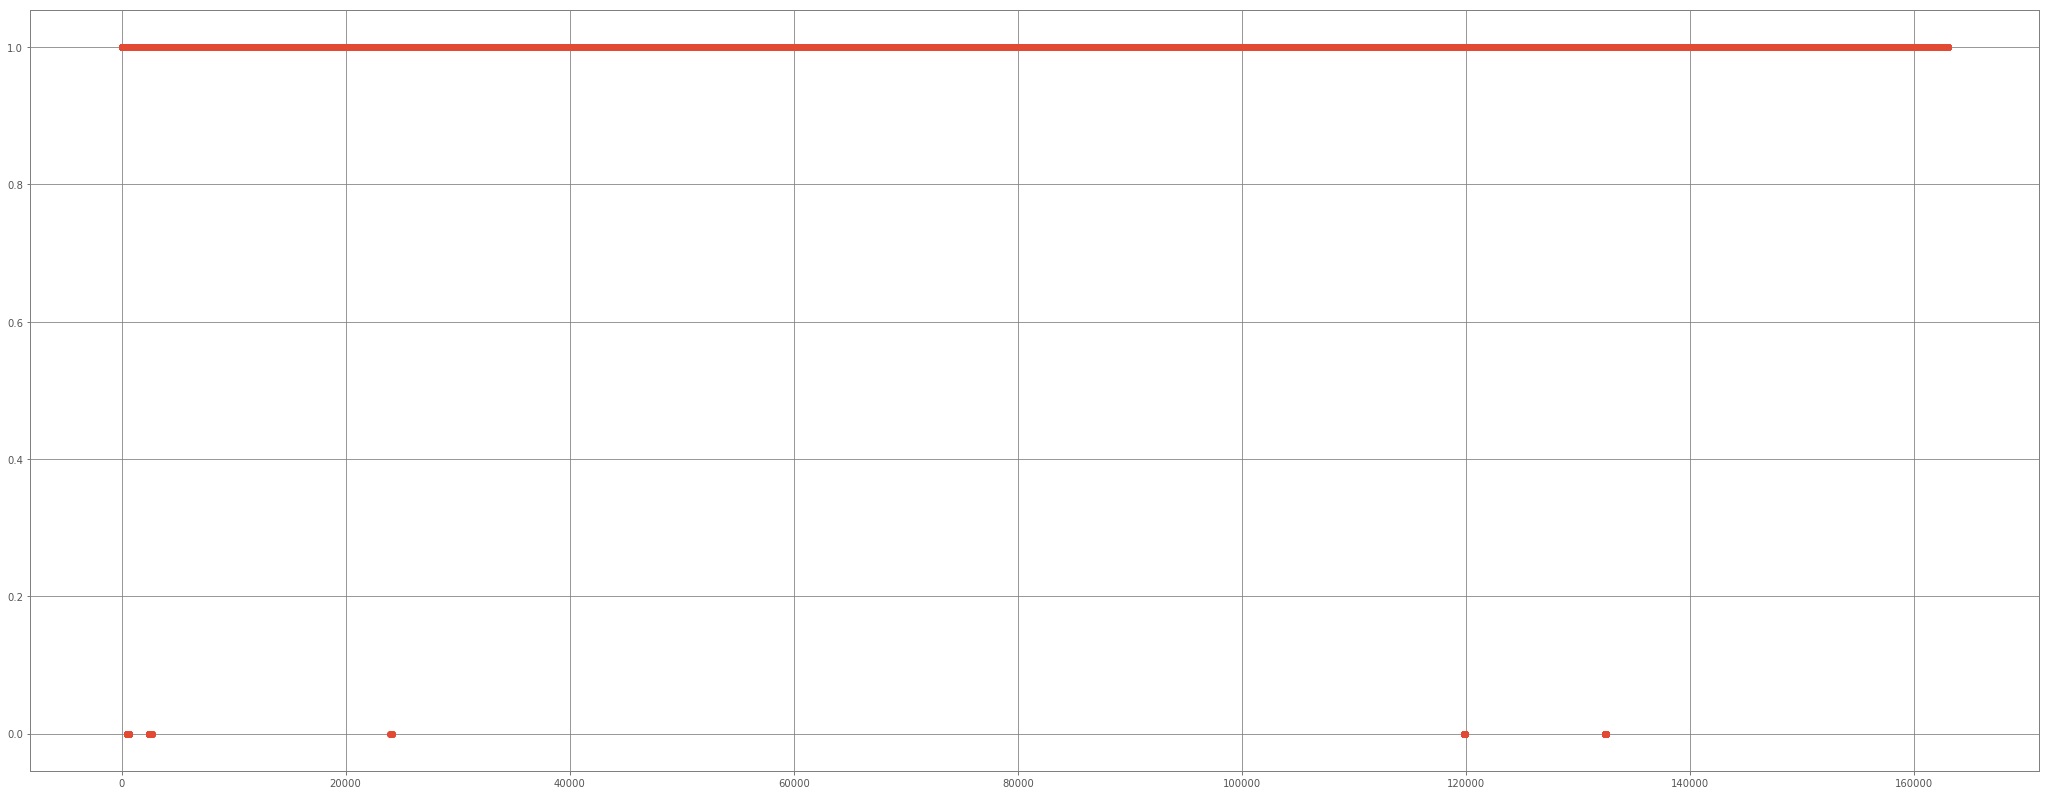

Egamma


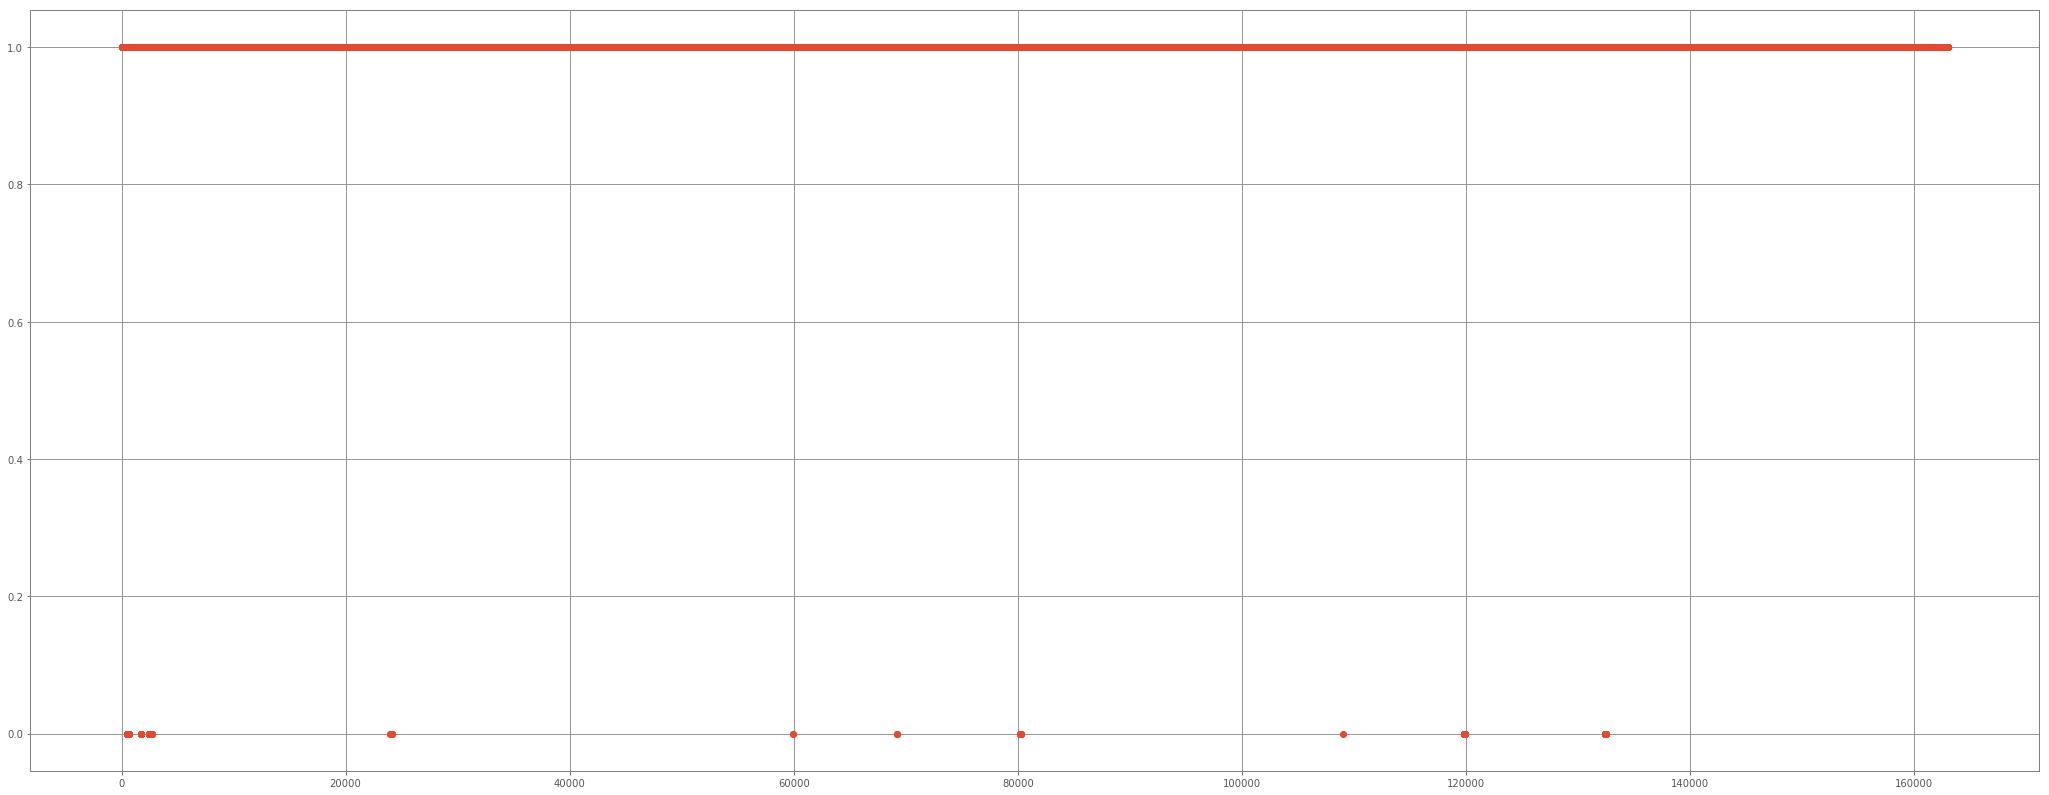

Muon


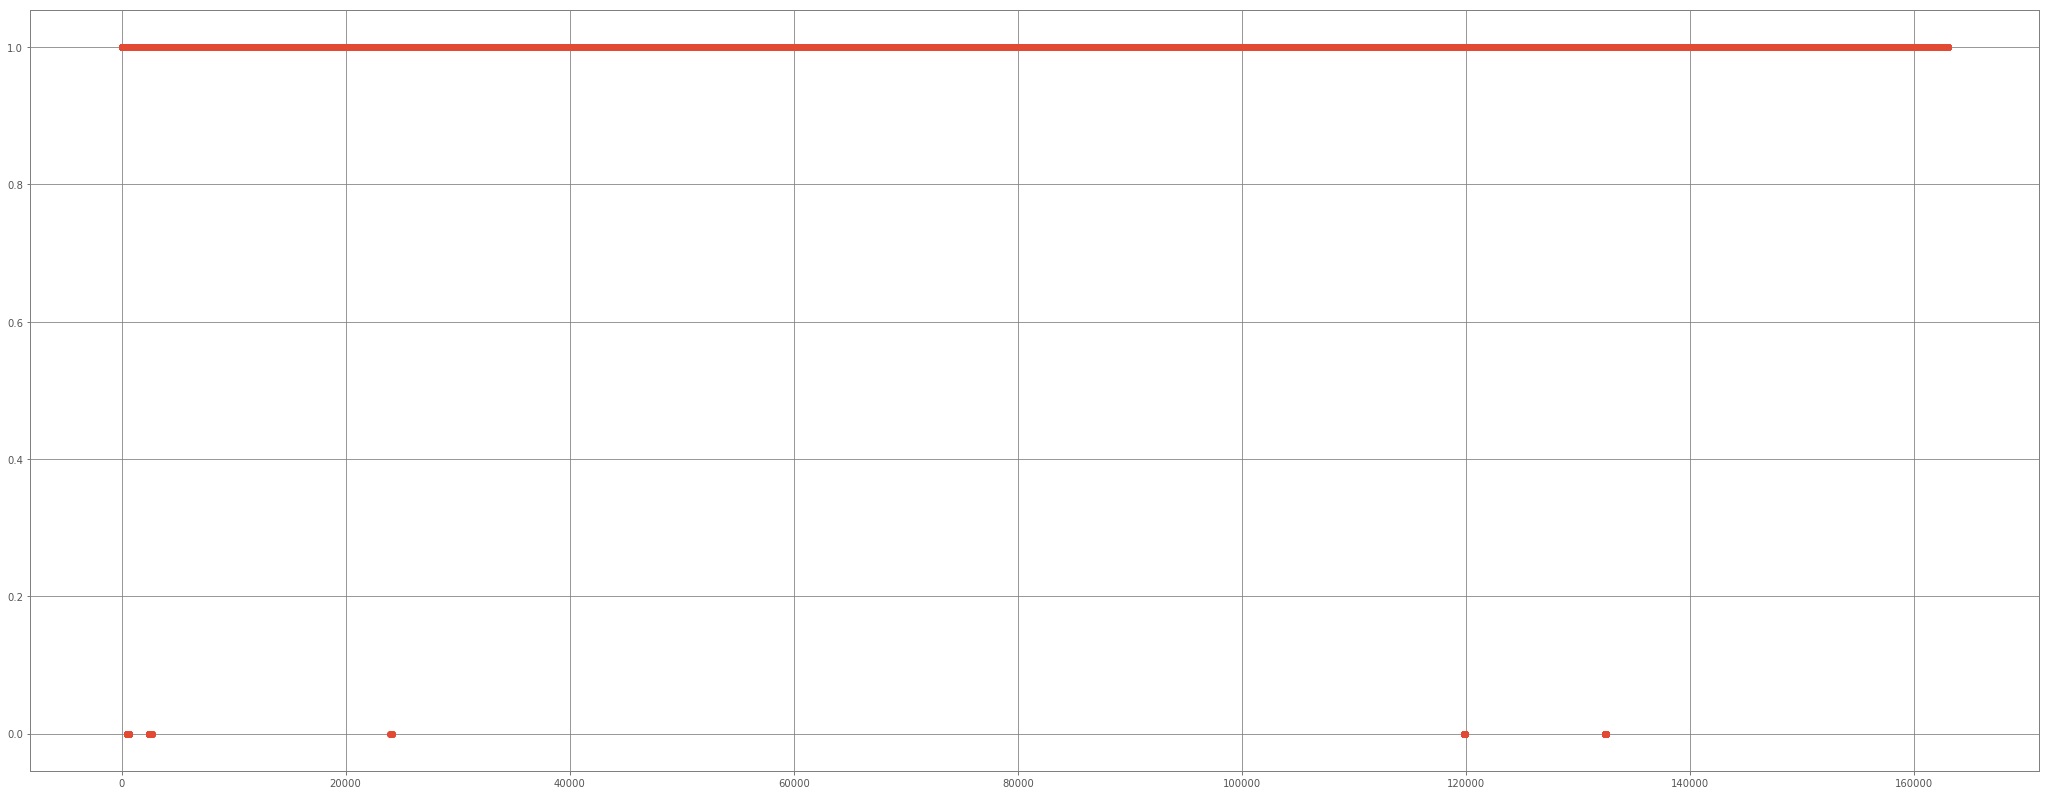

Jetmet


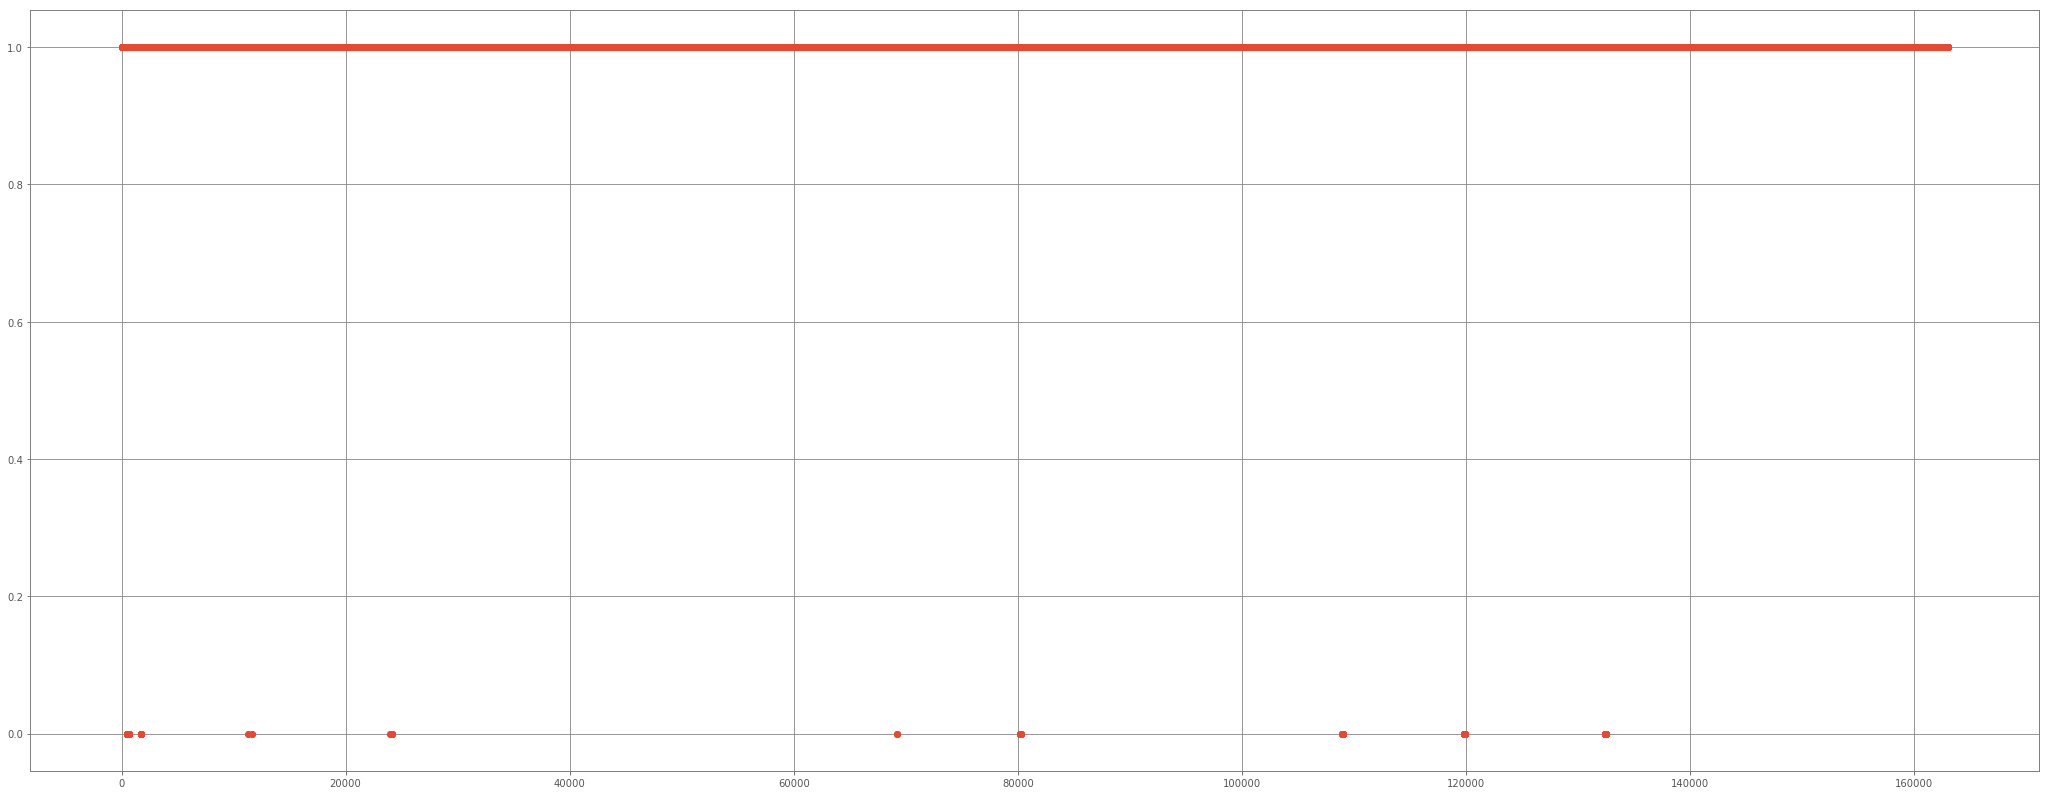

In [66]:
for sys in subsystemNames:
    fig = plt.figure(figsize=(36, 14))
    print(sys)
    plt.scatter(np.arange(data_features.shape[0]),sublabels[sys])
    plt.show()